# ΚΑΘΟΡΙΣΜΟΣ ΤΟΥ DIRECTORY ΟΠΟΥ ΒΡΙΣΚΕΤΑΙ ΤΟ ΑΡΧΕΙΟ

In [1]:
pwd # Καθορίζει το path file του αρχείου που εκτελείται

'C:\\Users\\Kosta\\uoa_py_course\\Final _Assigment_Ravanos'

# ΕΙΣΑΓΩΓΗ ΤΩΝ ΑΠΑΡΑΙΤΡΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΚΩΔΙΚΑ


In [2]:
# Βιβλιοθήκες που χρησιμοποιούνται για την εισαγωγή και επεξεργασία των δεδομένων
import random
import pandas as pd
import numpy as np
import warnings as wr
from collections import Counter
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Βιβλιοθήκες που χρησιμοποιούνται για τη δημιουργία γραφικών παραστάσεων και αναφορών
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, roc_curve, precision_score, average_precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc

# Βιβλιοθήκες που χρησιμοποιούνται για την εκπαίδευση των μοντέλων
import random
from sklearn.svm import SVC
import sklearn.neighbors as knn
from sklearn.model_selection import cross_val_score 
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ


In [3]:
# Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ ΠΟΥ ΕΙΝΑΙ ΑΠΑΡΑΙΤΗΤΟ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΑΛΓΟΡΙΘΜΟΥ


In [4]:
# Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_csv('data/Traffic Dataset.csv')

# Δημιουργία DataFrame
df.head() 

# Εμφάνιση του τύπου του αρχείου
type(df)

# Δίνει την εκτύπωση των πέντε πρώτων στηλών των δεδομένων
print(df.head())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  


# ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ ΠΡΙΝ ΑΠΟ ΤΗΝ ΑΦΑΙΡΕΣΗ ΤΟΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN


In [5]:
# Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

5952

In [6]:
# Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [7]:
# Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [8]:
# Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

Date  CarCount  BikeCount  BusCount  TruckCount    Total
count  5952.00   5952.00    5952.00   5952.00     5952.00  5952.00
mean     16.00     65.44      12.16     12.91       18.65   109.16
std       8.95     44.75      11.54     12.50       10.97    56.00
min       1.00      5.00       0.00      0.00        0.00    21.00
25%       8.00     18.75       3.00      2.00       10.00    54.00
50%      16.00     62.00       9.00     10.00       18.00   104.00
75%      24.00    103.00      19.00     20.00       27.00   153.00
max      31.00    180.00      70.00     50.00       60.00   279.00

In [9]:
# Επιστρέφει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


Coding Strategy για το classification λαμβάνοντας υπόψιν το dataset το οποιο θα χρησιμοποιηθεί:

Time:
Μετασχηματισμός της μεταβλητής Time: Θα μετατρέψουμε τη στήλη «Time» σε 24ωρη μορφή αναγνωρίζοντας τις διακρίσεις AM και PM.Το αποτελεσμα θα ειναι ενας αριθμος

Day of the Week:
Label Encoding: Αντί για one-hot encoding, το οποίο θα δημιουργούσε 7 νέες στήλες, μπορούμε να χρησιμοποιήσουμε label encoding για τη μετατροπή των ημερών της εβδομάδας σε αριθμητικές τιμές. Με αυτόν τον τρόπο ο αριθμός των στηλών θα είναι διαχειρίσιμος.
Παράδειγμα: Monday = 0, Tuesday = 1, ..., Sunday = 6.

Date:
Categorizing the Day of the Month:
Θα κατηγοριοποιήσουμε την ημέρα του μήνα σε τρεις ομάδες: «αρχή» (1-10), «μέση» (11-20) και «τέλος» (21-31).
Παράδειγμα: Ημερομηνία = 3 -> «αρχή», Ημερομηνία = 15 -> «μέση», Ημερομηνία = 25 -> «τέλος».
Αυτό θα γίνει με τη χρήση ενός κατωφλίου για να καθοριστεί αν μια ημερομηνία βρίσκεται στην αρχή, στη μέση ή στο τέλος του μήνα.

Final Plan:
Time: Μετατροπή της μεταβλητής "Time" σε "Hours of the Day" σε 24-hour format.
Day of the Week: Εφαρμογή label encoding για τη μετατροπή της ημέρας σε μια μοναδική αριθμητική τιμή.
Date: Κατηγοριοποίηση της ημερομηνίας σε «αρχή», «μέση» ή «τέλος» του μήνα --> Το «Date category» πρέπει να μετατραπεί σε αριθμητικές τιμές για να προχωρήσουμε με τους υπολογισμούς («αρχή» = 0, «μέση» = 1, «τέλος» = 2). 

# ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ DATASET ΚΑΙ ΕΚΑΘΑΡΙΣΜΟΣ ΤΩΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN


In [10]:
# Ελέγχει αν υπάρχουν τιμές NaN στο dataset. 
# Αν τρέξω την εντολή πριν από την παρουσίαση των δεδομένων που βρίσκεται στη συνέχεια η παρουσίαση θα γίνει χωρίς αυτές τις τιμές. Καλό θα ήταν η εντολή να τρέξει μετά την παρουσίαση των δεδομένων ώστε να μπορούν να τρέξουν και τα μοντέλα.
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

# ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ


In [11]:
# Βήμα 1: Μετατροπή Ώρας σε Ώρες της Ημέρας
def convert_time_to_hours(time_str):
    # Εξαγωγή ώρας και λεπτών
    period = time_str[-2:]
    time_parts = time_str[:-2].split(':')
    hour = int(time_parts[0])
    minute = int(time_parts[1]) / 60

    # Μετατροπή σε 24ωρη μορφή
    if period == 'PM' and hour != 12:
        hour += 12
    elif period == 'AM' and hour == 12:
        hour = 0

    return hour + minute

# Εφαρμογή της συνάρτησης μετατροπής στη στήλη Time
df['Hours of the Day'] = df['Time'].apply(convert_time_to_hours)

# Βήμα 2: Κωδικοποίηση Ημέρας της Εβδομάδας
label_encoder = LabelEncoder()
df['Day of the Week'] = label_encoder.fit_transform(df['Day of the week'])

# Βήμα 3: Κατηγοριοποίηση Ημερομηνίας σε Αρχή, Μέση, Τέλος του Μήνα και Μετατροπή σε Αριθμητική
def categorize_date(day):
    if day <= 10:
        return 0  # Αρχή του μήνα
    elif day <= 20:
        return 1  # Μέση του μήνα
    else:
        return 2  # Τέλος του μήνα

# Εφαρμογή της συνάρτησης κατηγοριοποίησης στη στήλη Date
df['Date Category'] = df['Date'].apply(categorize_date)

# Αφαίρεση των αρχικών στηλών που έχουν μετατραπεί
df.drop(columns=['Time', 'Day of the week', 'Date'], inplace=True)

# Εμφάνιση του μετασχηματισμένου συνόλου δεδομένων
print(df.head())

   CarCount  BikeCount  BusCount  TruckCount  Total Traffic Situation  \
0        13          2         2          24     41            normal   
1        14          1         1          36     52            normal   
2        10          2         2          32     46            normal   
3        10          2         2          36     50            normal   
4        11          2         1          34     48            normal   

   Hours of the Day  Day of the Week  Date Category  
0              0.00                5              0  
1              0.25                5              0  
2              0.50                5              0  
3              0.75                5              0  
4              1.00                5              0  


In [12]:
# Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Traffic Situation', 'Hours of the Day', 'Day of the Week',
       'Date Category'],
      dtype='object')

In [13]:
# Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.dtypes

CarCount               int64
BikeCount              int64
BusCount               int64
TruckCount             int64
Total                  int64
Traffic Situation     object
Hours of the Day     float64
Day of the Week        int32
Date Category          int64
dtype: object

In [14]:
# Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

CarCount  BikeCount  BusCount  TruckCount    Total  Hours of the Day  \
count   5952.00    5952.00   5952.00     5952.00  5952.00           5952.00   
mean      65.44      12.16     12.91       18.65   109.16             11.88   
std       44.75      11.54     12.50       10.97    56.00              6.93   
min        5.00       0.00      0.00        0.00    21.00              0.00   
25%       18.75       3.00      2.00       10.00    54.00              5.94   
50%       62.00       9.00     10.00       18.00   104.00             11.88   
75%      103.00      19.00     20.00       27.00   153.00             17.81   
max      180.00      70.00     50.00       60.00   279.00             23.75   

       Day of the Week  Date Category  
count          5952.00        5952.00  
mean              3.19           1.03  
std               2.01           0.82  
min               0.00           0.00  
25%               1.00           0.00  
50%               3.00           1.00  
75%               5.00           2.00  
max               6.00           2.00

In [15]:
# Επιστρέφει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CarCount           5952 non-null   int64  
 1   BikeCount          5952 non-null   int64  
 2   BusCount           5952 non-null   int64  
 3   TruckCount         5952 non-null   int64  
 4   Total              5952 non-null   int64  
 5   Traffic Situation  5952 non-null   object 
 6   Hours of the Day   5952 non-null   float64
 7   Day of the Week    5952 non-null   int32  
 8   Date Category      5952 non-null   int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 395.4+ KB


In [16]:
# Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.dtypes

CarCount               int64
BikeCount              int64
BusCount               int64
TruckCount             int64
Total                  int64
Traffic Situation     object
Hours of the Day     float64
Day of the Week        int32
Date Category          int64
dtype: object

In [17]:
# Ομαδοποιεί τα δεδομένα βάσει της στήλης "Traffic Situation", υπολογίζει διάφορα στατιστικά μέτρα για κάθε ομάδα
df.groupby("Traffic Situation", observed=True).describe().T

Traffic Situation      heavy    high     low   normal
CarCount      count  1137.00  371.00  834.00  3610.00
              mean    130.67   80.09   44.41    48.25
              std      15.77   19.03   24.30    35.91
              min      96.00   32.00    5.00     5.00
              25%     119.00   66.00   18.00    14.00
...                      ...     ...     ...      ...
Date Category min       0.00    0.00    0.00     0.00
              25%       0.00    0.00    0.00     0.00
              50%       1.00    1.00    1.00     1.00
              75%       2.00    2.00    2.00     2.00
              max       2.00    2.00    2.00     2.00

[64 rows x 4 columns]

# ΔΗΜΙΟΥΡΓΙΑ ΙΔΙΟΥ ΣΤΥΛ ΚΑΙ ΜΕΓΕΘΟΥΣ ΓΡΑΦΙΚΩΝ ΠΑΡΑΣΤΑΣΕΩΝ

In [18]:
# Η εντολή style.available επιστρέφει μια λίστα με τα διαθέσιμα στυλ γραφικών παραστάσεων. Αυτά τα στυλ μπορούν να χρησιμοποιηθούν για να αλλάξουν την εμφάνιση των διαγραμμάτων.
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [19]:
# Η εντολή style.use("dark_background") ορίζει το στυλ των γραφικών παραστάσεων σε "dark_background", προσφέροντας μια σκοτεινή θεματολογία για όλα τα διαγράμματα.
style.use("dark_background")  

# Η εντολή ορίζει το προεπιλεγμένο μέγεθος των διαγραμμάτων σε 14x8 ίντσες.
plt.rcParams['figure.figsize'] = (14, 8)

# ΔΙΑΓΡΑΜΜΑΤΑ

# Διαγράμμτα Διασποράς με βάση την Κατηγορία της Μεταβλητής 'Traffic situation' για όλες τις Μεταβλητές

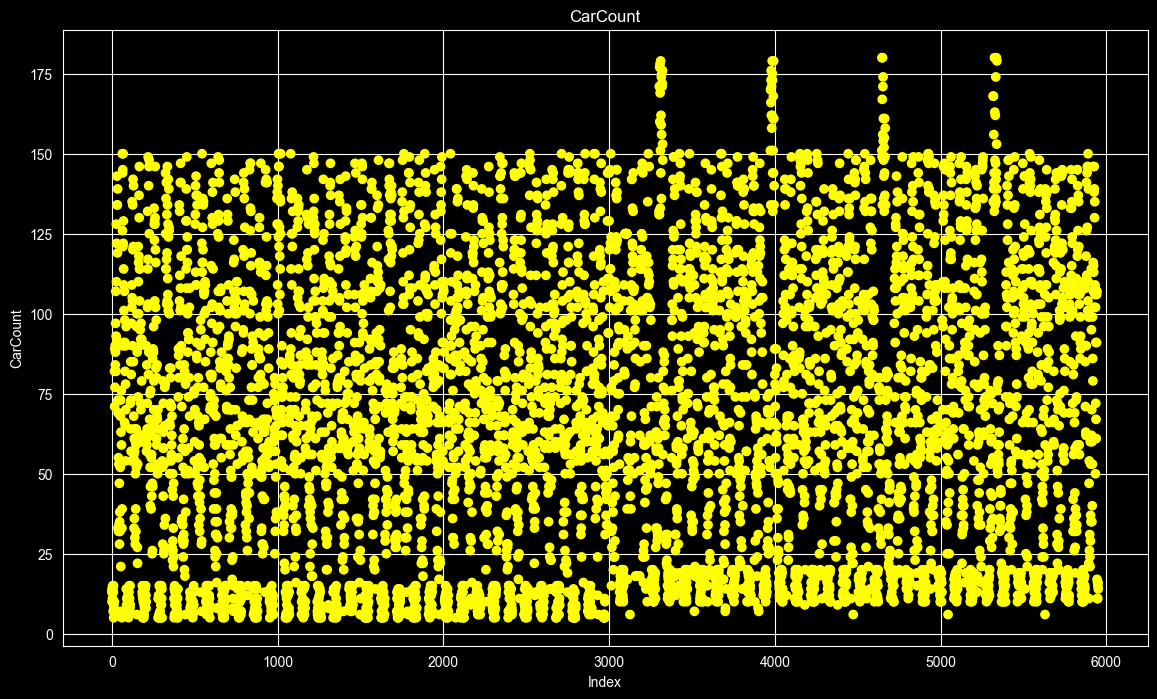

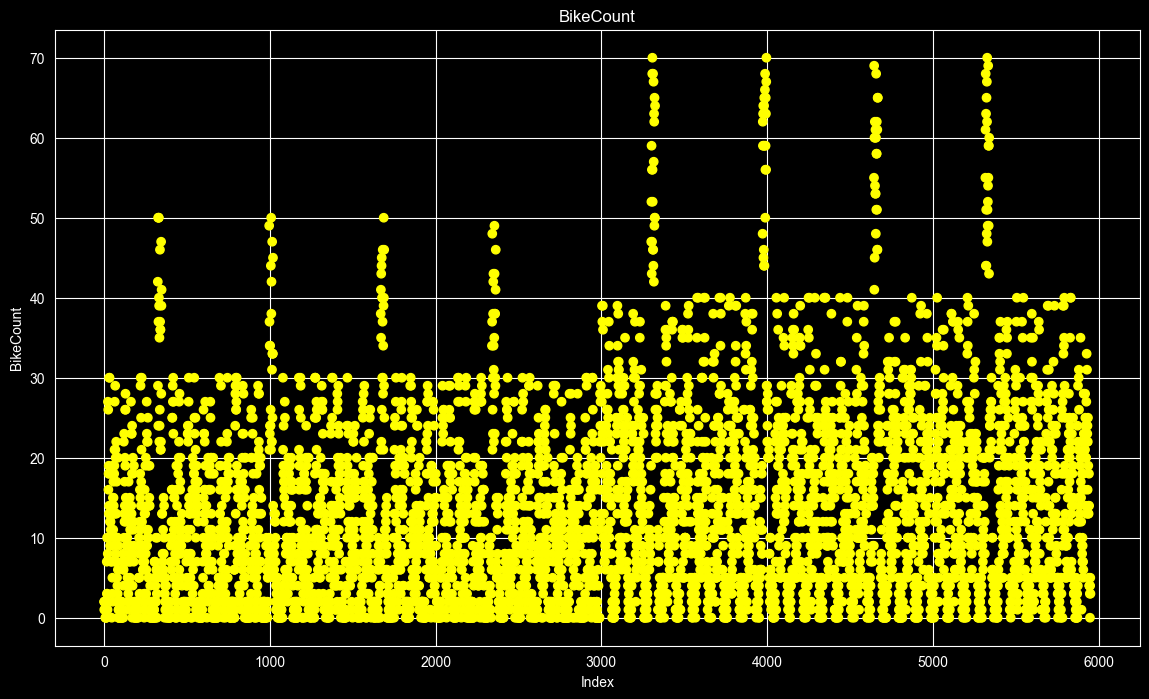

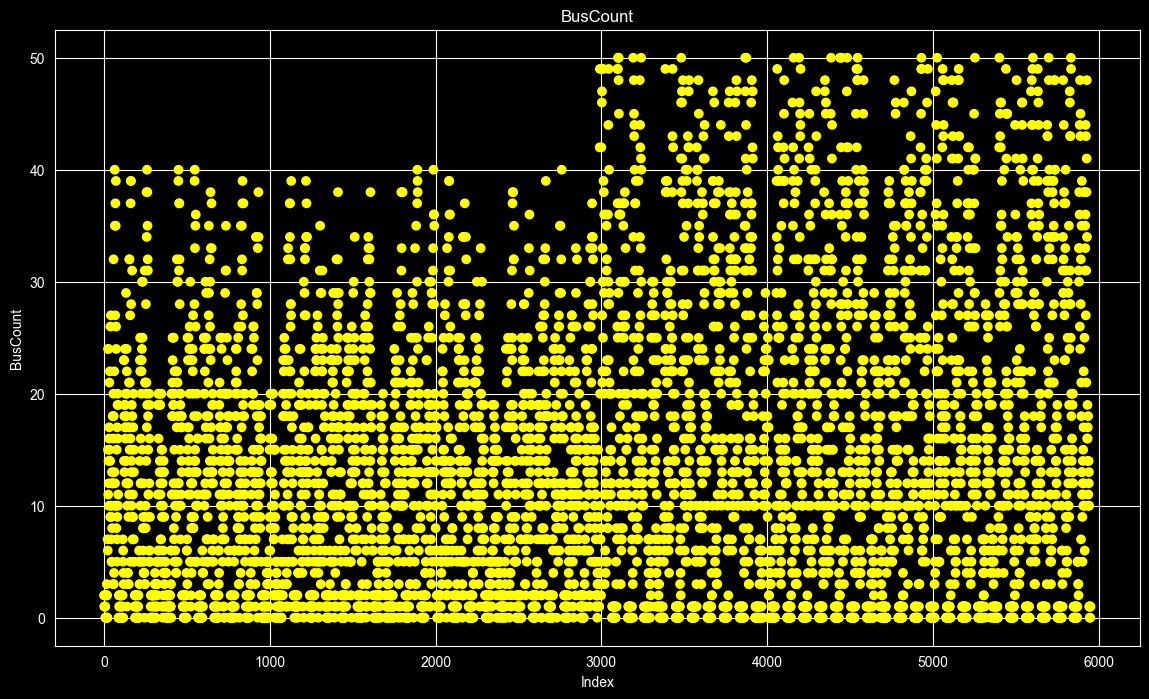

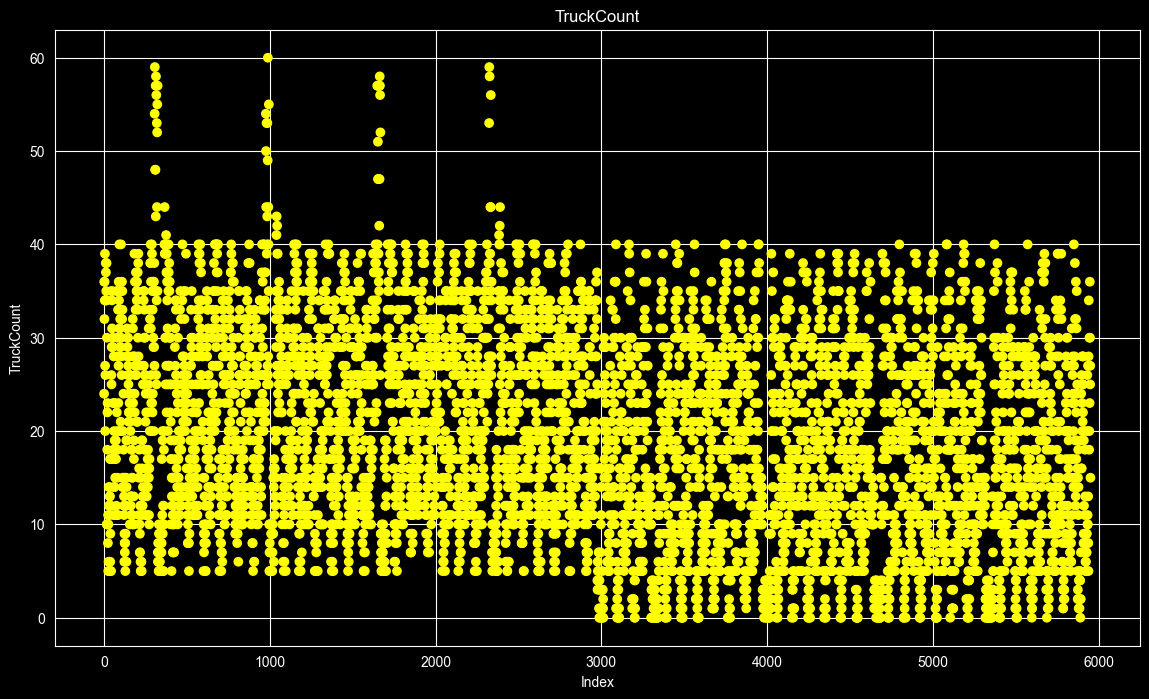

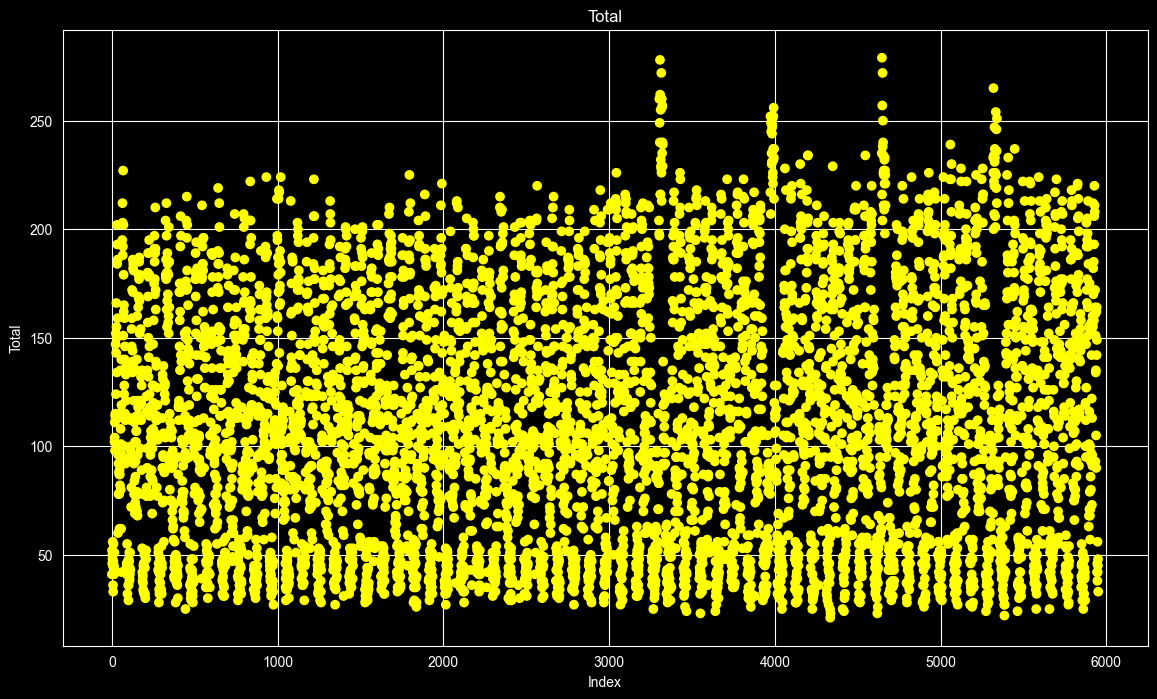

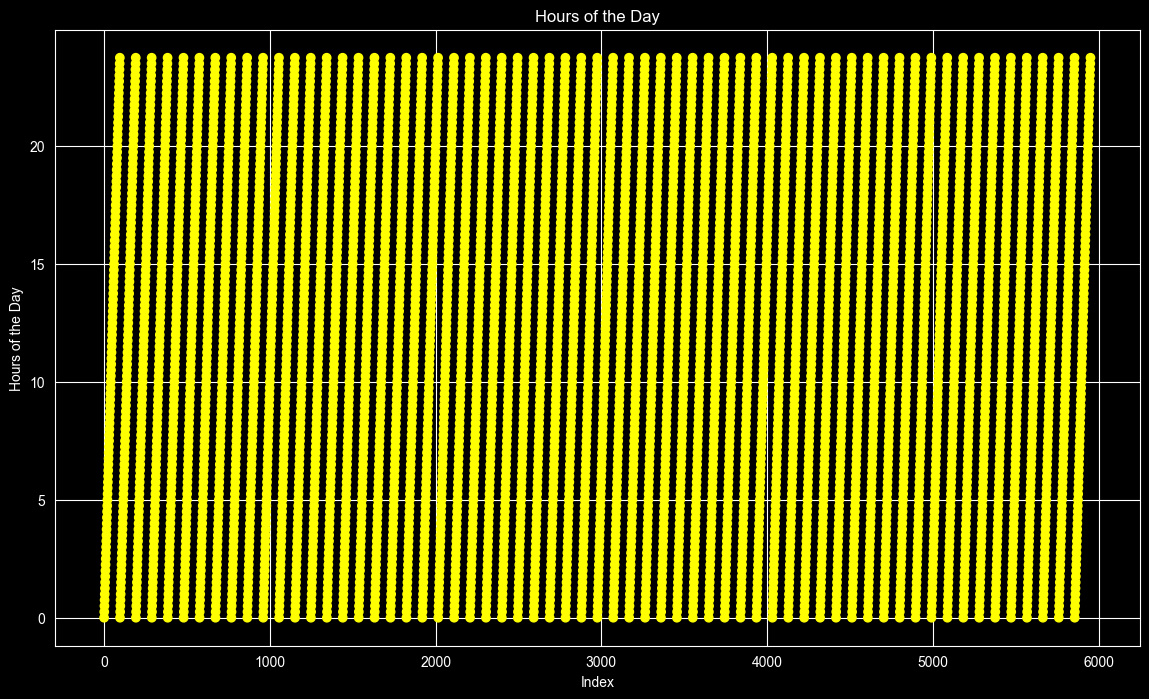

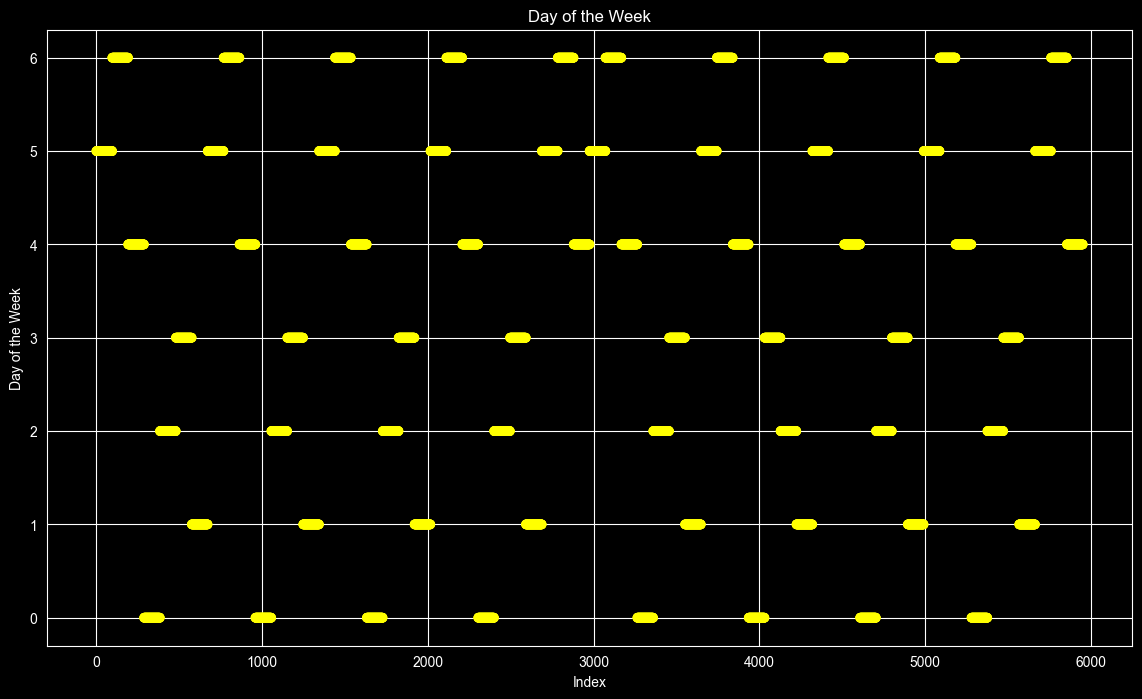

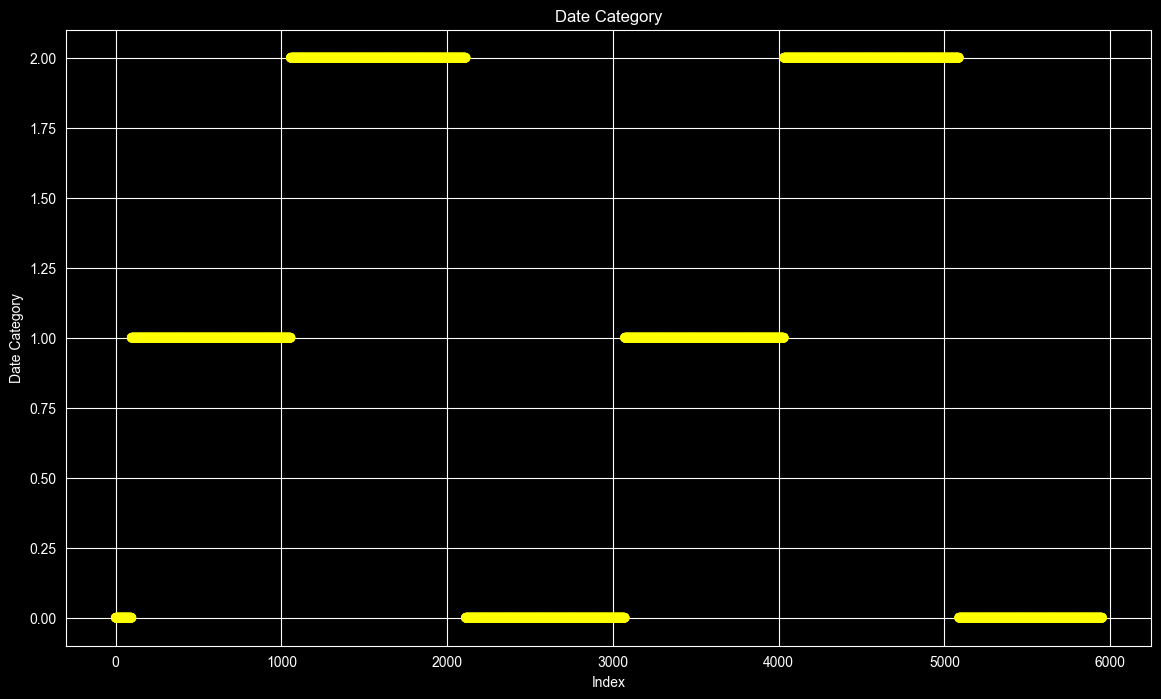

In [20]:
# Λίστα με τα ονόματα όλων των στηλών
all_columns = df.columns.tolist()

# Δημιουργία scatter-plots για κάθε μεταβλητή
for column in all_columns:
    
    if column != 'Traffic Situation': #Εξαιρούμε τη 'Traffic Situation' από τη λίστα των στηλών
        plt.figure(figsize=(14,8))
        colors = np.where(df['Traffic Situation']==1, 'red', 'yellow') #Ορίζουμε τα χρώματα ανάλογα με την τιμή της 'Traffic Situation'
        plt.scatter(df.index, df[column], c=colors)
        plt.title(column)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

# Διαγράμμτα Διασποράς με βάση την Κατηγορία της Μεταβλητής 'Traffic Situation' για τα διάφορα ζεύγη μεταβλητών

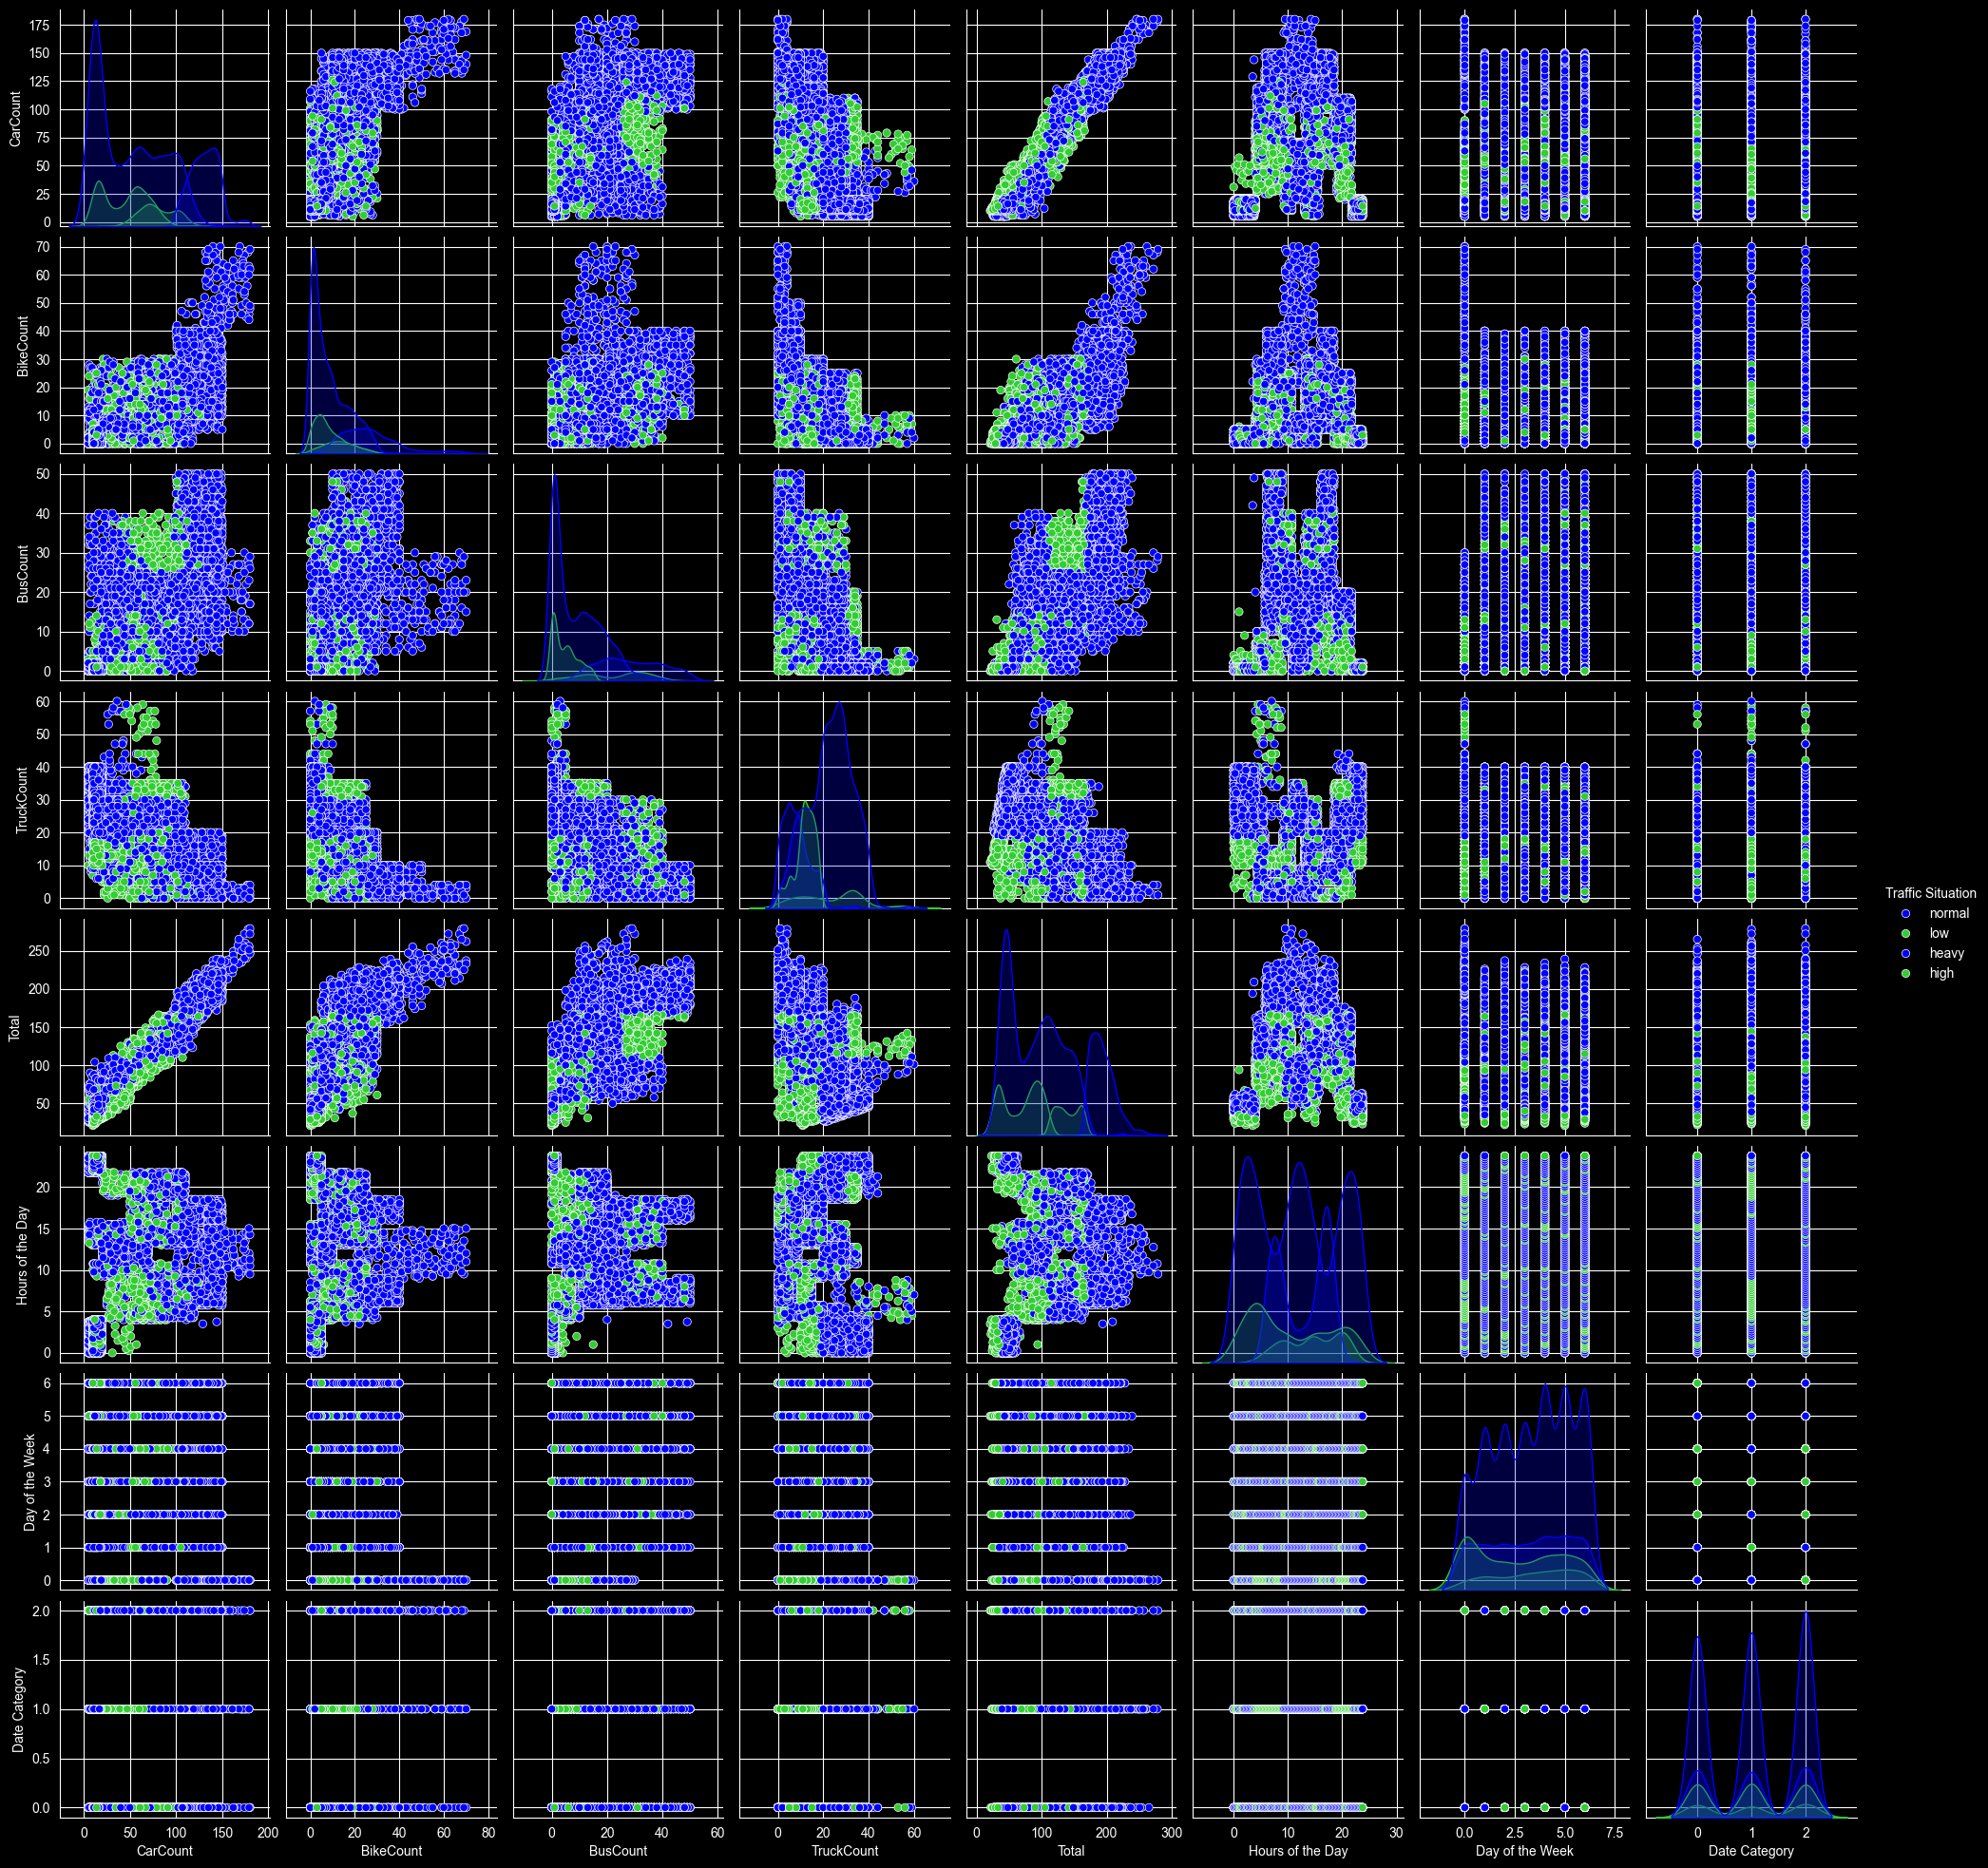

In [21]:
# Αγνοεί όλες τις προειδοποιήσεις που μπορεί να παράγονται κατά την εκτέλεση του κώδικα.
wr.filterwarnings('ignore')

# Δημιουργία διαγράμματος που παρουσιάζει τις σχέσεις μεταξύ όλων των ζευγών μεταβλητών στο DataFrame, με διαφορετικά χρώματα για τις διάφορες κατηγορίες της μεταβλητής 'TenYearCHD'.
sns.pairplot(data=df, hue='Traffic Situation', palette=['Blue', 'limegreen']);

# Density Plots

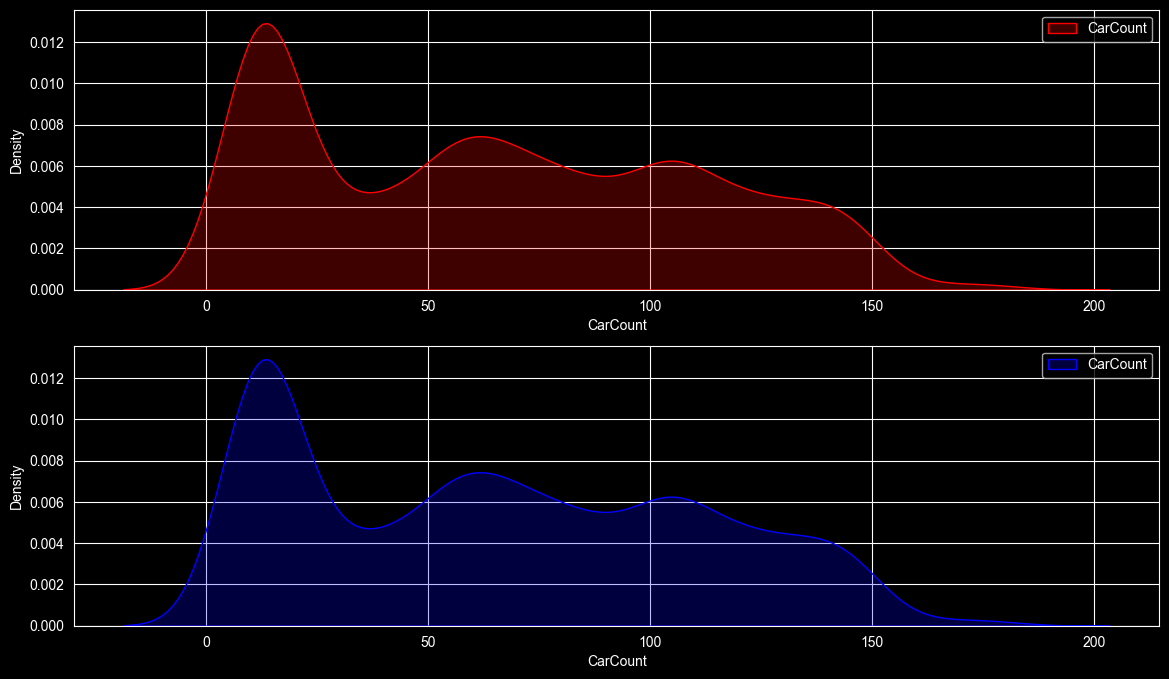

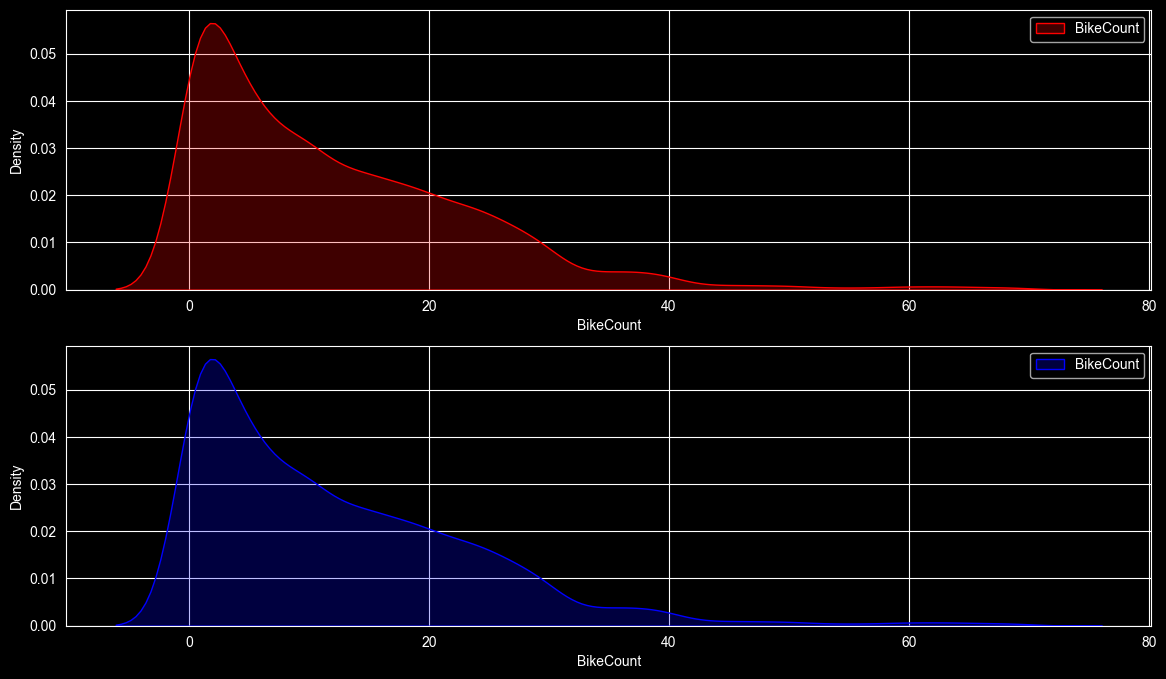

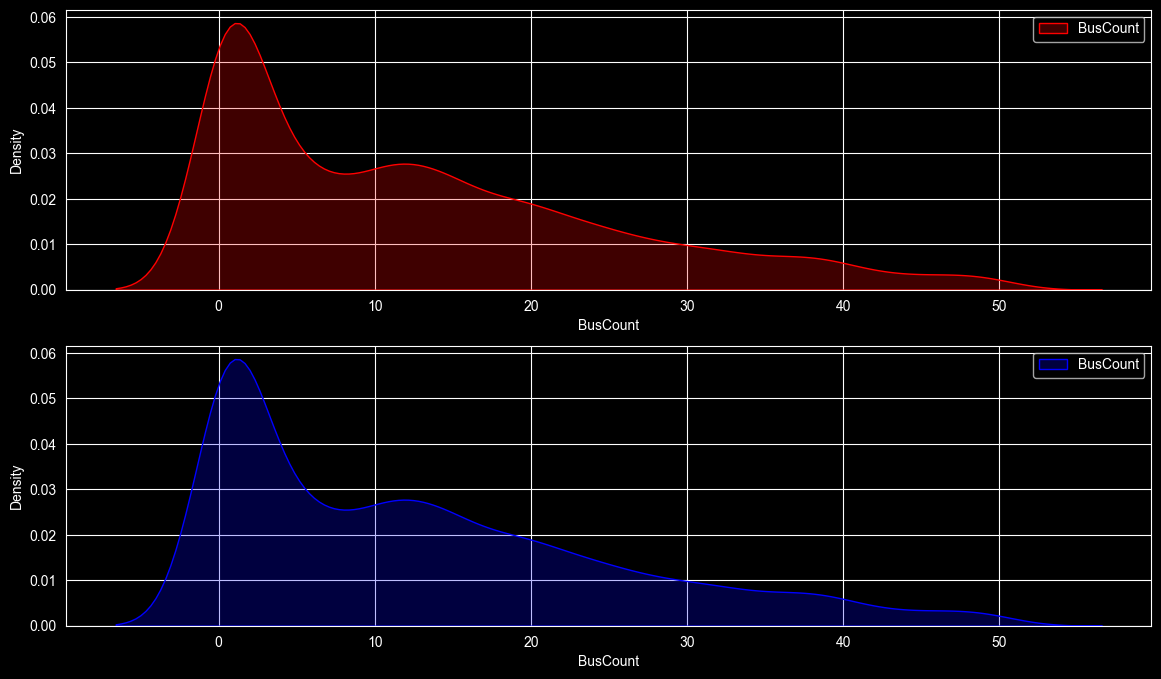

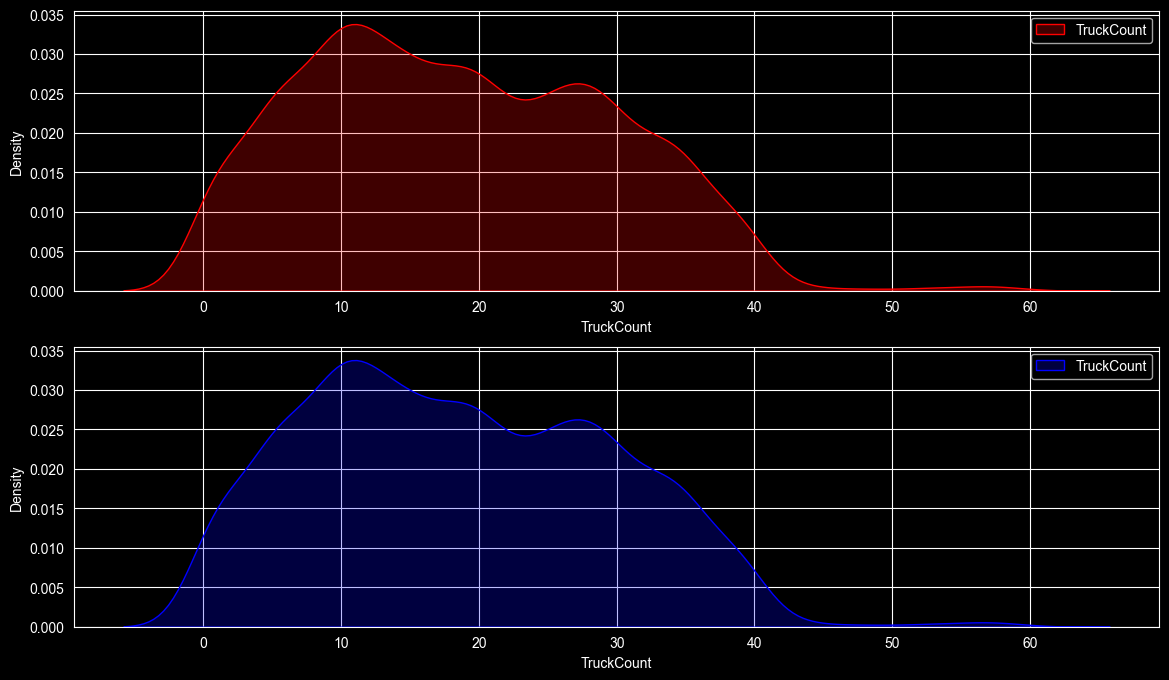

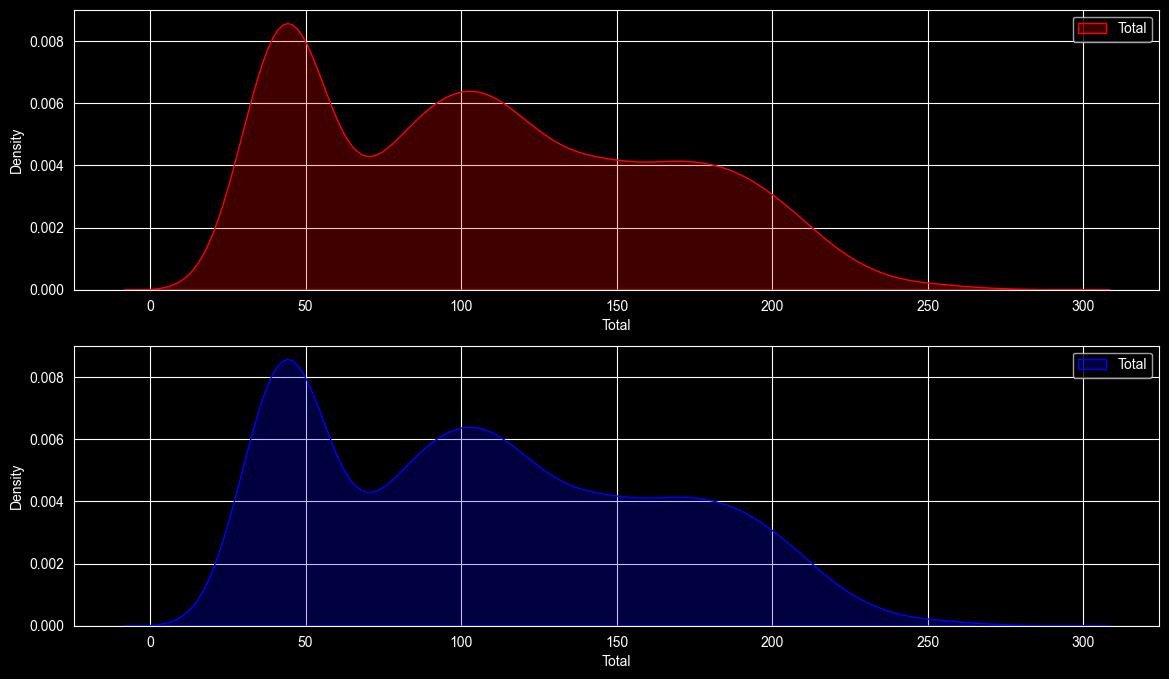

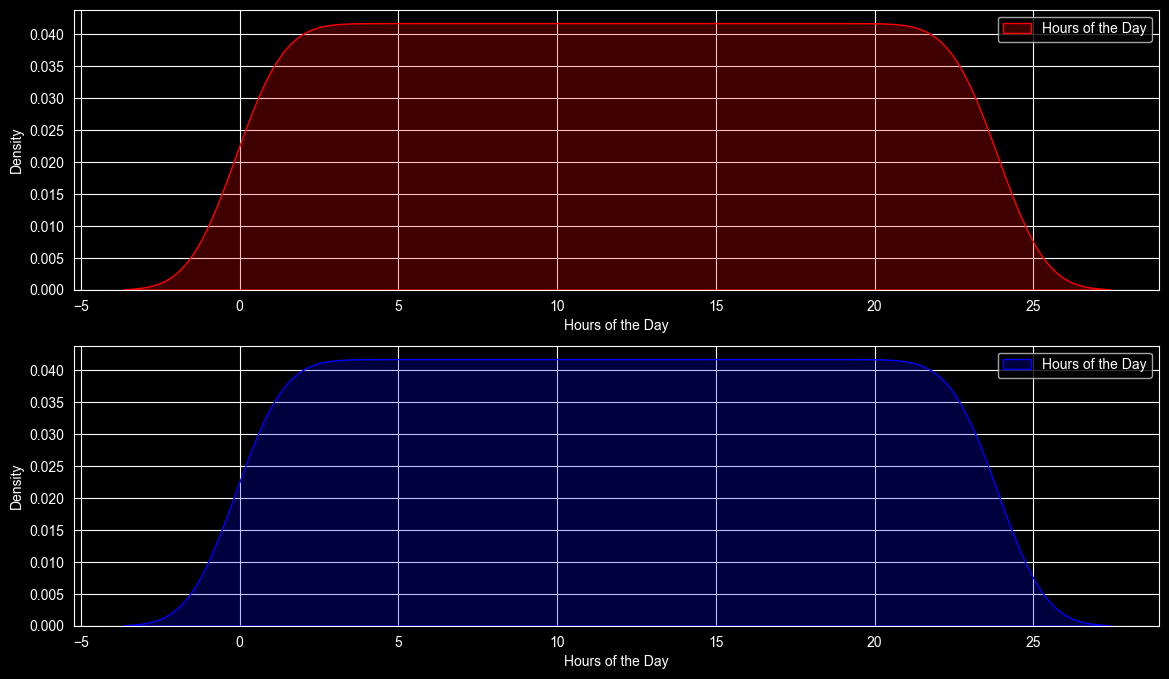

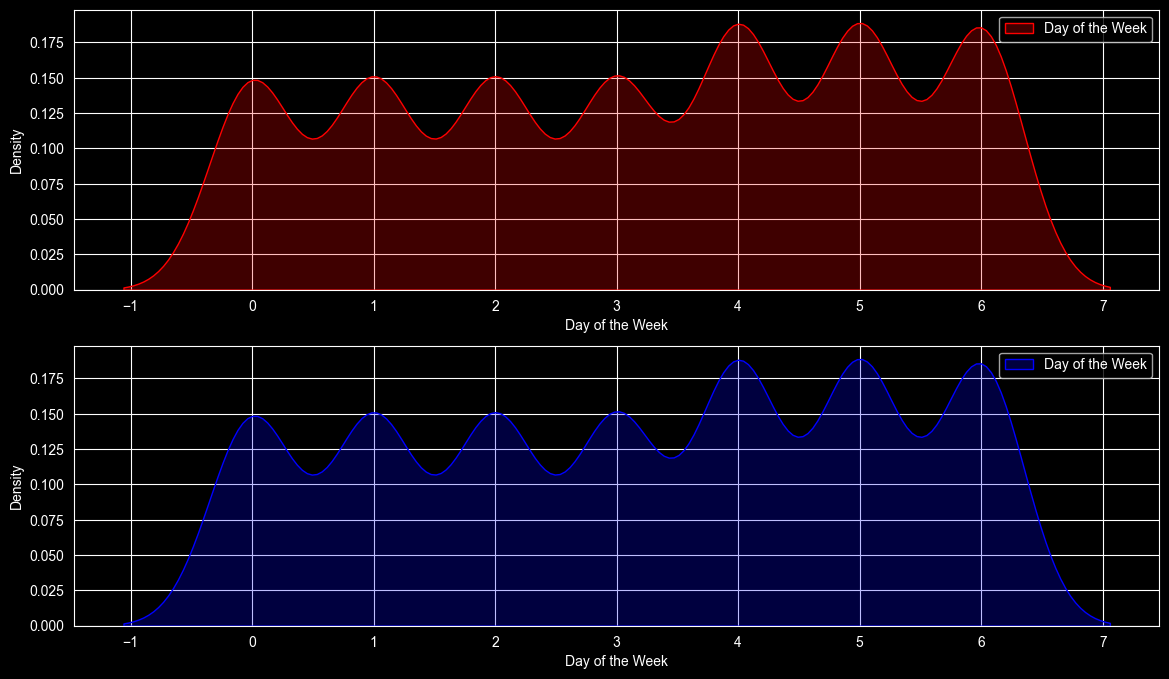

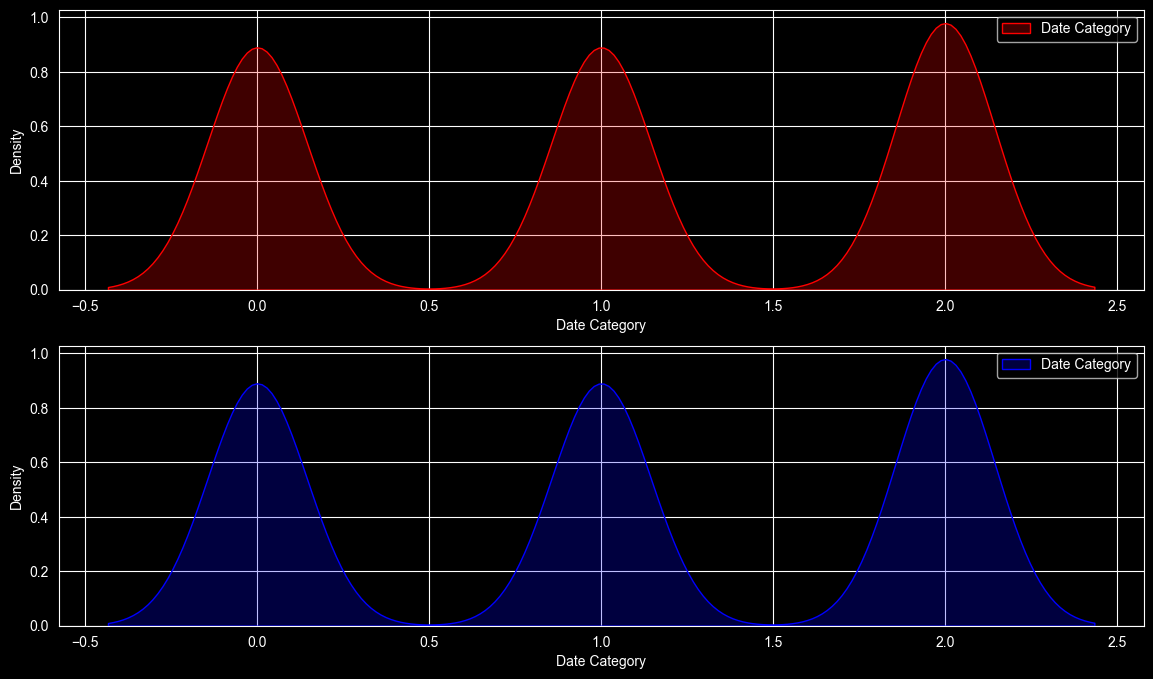

In [22]:
# Λίστα με τα ονόματα όλων των στηλών
all_columns = df.columns.tolist()

# Δημιουργία διαγραμμάτων κατανομής για κάθε μεταβλητή
for column in all_columns:
    if column != 'Traffic Situation':  # Εξαιρούμε τη 'Traffic Situation' από τη λίστα των στηλών
        ax1 = plt.subplot(211)
        sns.kdeplot(df[column], color = 'r', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        ax2 = plt.subplot(212)
        sns.kdeplot(df[column], color = 'b', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        plt.show()

# ΣΥΝΤΕΛΕΣΤΗΣ ΣΥΣΧΕΤΙΣΗΣ

In [23]:
# Μετατροπή της εξαρτημένης μεταβλητής (Traffic Situation) σε αριθμητική για τον υπολογισμό συσχέτισης
df['Traffic Situation Encoded'] = label_encoder.fit_transform(df['Traffic Situation'])

# Υπολογισμός πίνακα συσχέτισης χωρίς τη στήλη Traffic Situation
correlation_matrix = df.drop(columns=['Traffic Situation']).corr()

# Εμφάνιση του πίνακα συσχέτισης
print(correlation_matrix)

# Αφαίρεση της προσωρινά κωδικοποιημένης εξαρτημένης μεταβλητής
df.drop(columns=['Traffic Situation Encoded'], inplace=True)

                           CarCount  BikeCount  BusCount  TruckCount  \
CarCount                   1.00e+00   7.08e-01  6.58e-01       -0.62   
BikeCount                  7.08e-01   1.00e+00  5.78e-01       -0.61   
BusCount                   6.58e-01   5.78e-01  1.00e+00       -0.56   
TruckCount                -6.15e-01  -6.08e-01 -5.58e-01        1.00   
Total                      9.72e-01   7.82e-01  7.59e-01       -0.55   
Hours of the Day           1.54e-01   1.18e-01  1.81e-01       -0.03   
Day of the Week            7.88e-03  -9.61e-02  1.12e-01        0.02   
Date Category             -1.29e-02  -4.25e-04 -3.19e-03        0.02   
Traffic Situation Encoded -6.83e-01  -5.77e-01 -6.11e-01        0.49   

                              Total  Hours of the Day  Day of the Week  \
CarCount                   9.72e-01          1.54e-01         7.88e-03   
BikeCount                  7.82e-01          1.18e-01        -9.61e-02   
BusCount                   7.59e-01          1.81e-01    

# ΜΕΘΟΔΟΣ ΚΝΝ ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ ΤΗΣ ΠΙΘΑΝΟΤΗΤΑΣ ΕΜΦΑΝΙΣΗΣ ΚΥΚΛΟΦΟΡΙΑΚΗΣ ΣΥΜΦΟΡΗΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΑΝΑΛΟΓΙΑ ΟΧΗΜΑΤΩΝ ΤΟ ΧΡΟΝΙΚΟ ΣΗΜΕΙΟ ΚΑΙ ΤΗΝ ΑΚΡΙΒΗ ΜΕΡΑ ΑΛΛΑ ΚΑΙ ΤΗΝ ΠΕΡΙΟΔΟ ΤΟΥ ΜΗΝΑ 

# Μοντέλο K-Nearest Neighbors (KNN) 

In [42]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

CarCount  BikeCount  BusCount  TruckCount  Total Traffic Situation  \
0        13          2         2          24     41            normal   
1        14          1         1          36     52            normal   
2        10          2         2          32     46            normal   
3        10          2         2          36     50            normal   
4        11          2         1          34     48            normal   
5        15          1         1          39     56            normal   
6        14          2         2          27     45            normal   
7        13          2         1          20     36            normal   
8         7          0         0          26     33            normal   
9        13          0         0          34     47            normal   

   Hours of the Day  Day of the Week  Date Category  
0              0.00                5              0  
1              0.25                5              0  
2              0.50                5              0  
3              0.75                5              0  
4              1.00                5              0  
5              1.25                5              0  
6              1.50                5              0  
7              1.75                5              0  
8              2.00                5              0  
9              2.25                5              0

In [43]:
# Ορισμός εξαρτημένης (y) και ανεξάρτητων μεταβλητών (X)
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Εμφάνιση των πρώτων γραμμών των X και y για έλεγχο
print("Independent variables (X):")
print(X.head())

print("\nDependent variable (y):")
print(y.head())

Independent variables (X):
   CarCount  BikeCount  BusCount  TruckCount  Total  Hours of the Day  \
0        13          2         2          24     41              0.00   
1        14          1         1          36     52              0.25   
2        10          2         2          32     46              0.50   
3        10          2         2          36     50              0.75   
4        11          2         1          34     48              1.00   

   Day of the Week  Date Category  
0                5              0  
1                5              0  
2                5              0  
3                5              0  
4                5              0  

Dependent variable (y):
0    normal
1    normal
2    normal
3    normal
4    normal
Name: Traffic Situation, dtype: object


In [44]:
# Standardization των ανεξάρτητων μεταβλητών
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Μετατροπή των δεδομένων πίσω σε DataFrame για έλεγχο
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Εμφάνιση των πρώτων γραμμών των X_standardized για έλεγχο
print("Standardized independent variables (X):")
print(X_standardized_df.head())

print("\nDependent variable (y):")
print(y.head())

Standardized independent variables (X):
   CarCount  BikeCount  BusCount  TruckCount  Total  Hours of the Day  \
0     -1.17      -0.88     -0.87        0.49  -1.22             -1.71   
1     -1.15      -0.97     -0.95        1.58  -1.02             -1.68   
2     -1.24      -0.88     -0.87        1.22  -1.13             -1.64   
3     -1.24      -0.88     -0.87        1.58  -1.06             -1.61   
4     -1.22      -0.88     -0.95        1.40  -1.09             -1.57   

   Day of the Week  Date Category  
0              0.9          -1.26  
1              0.9          -1.26  
2              0.9          -1.26  
3              0.9          -1.26  
4              0.9          -1.26  

Dependent variable (y):
0    normal
1    normal
2    normal
3    normal
4    normal
Name: Traffic Situation, dtype: object


In [45]:
# Εκτυπώνει το εύρος των τιμών του πίνακα X
(X.max() - X.min())

CarCount            175.00
BikeCount            70.00
BusCount             50.00
TruckCount           60.00
Total               258.00
Hours of the Day     23.75
Day of the Week       6.00
Date Category         2.00
dtype: float64

In [46]:
# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Εμφάνιση των πρώτων γραμμών των συνόλων δεδομένων για έλεγχο
print("Training set (X_train):")
print(X_train[:5])

print("\nTraining set (y_train):")
print(y_train[:5])

print("\nTest set (X_test):")
print(X_test[:5])

print("\nTest set (y_test):")
print(y_test[:5])

Training set (X_train):
[[-1.03788345 -0.88077321 -0.95329038  1.30818257 -0.96731386 -1.42541081
   0.9001866   1.17669681]
 [-1.14962635  0.59274999  0.72715516 -0.33232458 -0.69941657  0.16238857
  -1.09308373 -1.25514326]
 [ 0.92879145  1.112817    2.00749462 -0.42346387  1.33660284  0.66759747
  -1.09308373 -0.03922323]
 [-0.76970051 -0.27402836 -0.15307822  0.85248614 -0.5386782  -0.12630222
   0.40186902 -1.25514326]
 [ 1.17462581 -0.18735053  0.00696421 -0.2411853   0.85438771  0.63151112
   1.39850418 -1.25514326]]

Training set (y_train):
4328    normal
2644    normal
642      heavy
5900    normal
2177    normal
Name: Traffic Situation, dtype: object

Test set (X_test):
[[-1.03788345 -0.96745105 -1.0333116  -0.42346387 -1.34237007 -1.46149716
  -0.09644856  1.17669681]
 [ 1.15227724 -0.18735053 -0.23309944 -0.05890673  0.81866808 -0.88411557
  -1.09308373  1.17669681]
 [-0.30038036 -0.44738403 -0.95329038  0.67020756 -0.41365946 -0.05412952
  -1.09308373  1.17669681]
 [ 0.325

In [47]:
# Δημιουργία KNeighborsClassifier με K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Πρόβλεψη ετικετών για το δοκιμαστικό σύνολο
y_pred = knn.predict(X_test)

# Αξιολόγηση της απόδοσης του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of KNeighborsClassifier with K=3:", accuracy)
print("\nClassification Report:\n", report)

Accuracy of KNeighborsClassifier with K=3: 0.9118387909319899

Classification Report:
               precision    recall  f1-score   support

       heavy       0.92      0.96      0.94       216
        high       0.74      0.62      0.67        81
         low       0.89      0.83      0.86       146
      normal       0.93      0.95      0.94       748

    accuracy                           0.91      1191
   macro avg       0.87      0.84      0.85      1191
weighted avg       0.91      0.91      0.91      1191



In [48]:
# Εκπαίδευση του ταξινομητή
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

# Ένταξη μιας νέας παρατήρησης στο μοντέλο KNN για την πρόβλεψη της κλάσης της

In [50]:
# Δημιουργία μιας νέας τυχαίας παρατήρησης
# Παράδειγμα τιμών για CarCount, BikeCount, BusCount, TruckCount, Total, Hours of the Day, Day of the Week, Date Category
new_observation = np.array([[70, 1, 9, 14, 46, 15.5, 2, 1]])  

# Standardization της νέας παρατήρησης χρησιμοποιώντας τον ίδιο scaler
new_observation_standardized = scaler_standard.transform(new_observation)

# Πρόβλεψη της κλάσης για τη νέα παρατήρηση
new_prediction = knn.predict(new_observation_standardized)

print("The predicted class for the new observation is:", new_prediction[0])

The predicted class for the new observation is: low


C:\Users\Kosta\uoa_py_course\course_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [51]:
# Πρόβλεψη της κλάσης για τη νέα παρατήρηση
new_prediction = knn.predict(new_observation_standardized)

# Υπολογισμός των πιθανοτήτων για κάθε κλάση για τη νέα παρατήρηση
class_probabilities = knn.predict_proba(new_observation_standardized)

print("The predicted class for the new observation is:", new_prediction[0])
print("Class probabilities for the new observation are:", class_probabilities[0])
# 

The predicted class for the new observation is: low
Class probabilities for the new observation are: [0.         0.         0.66666667 0.33333333]


# Υπολογισμός και Εκτύπωση Μετρικών Απόδοσης του Μοντέλου KNN

In [52]:
# Fit the label encoder with y's unique values
label_encoder = LabelEncoder()
label_encoder.fit(y.unique())

# Αξιολόγηση της απόδοσης του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_encoder.transform(y_test), knn.predict_proba(X_test), multi_class='ovr')

print(f"Ακρίβεια: {accuracy*100:.2f}%")
print(f"Ανάκληση: {recall*100:.2f}%")
print(f"Ακρίβεια F1: {f1*100:.2f}%")
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

Ακρίβεια: 91.18%
Ανάκληση: 91.18%
Ακρίβεια F1: 91.00%
Περιοχή κάτω από την καμπύλη ROC: 95.92%


# Μοντέλο K-Nearest Neighbors (KNN) με διαφορετικη Train-Test αναλογία και Κ

In [53]:
# Ορισμός χαρακτηριστικών (X) και ετικετών (y)
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα (60-40)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.4, random_state=42)

# Εκτύπωση των μεγεθών των συνόλων εκπαίδευσης και δοκιμής για έλεγχο
print("Training set (X_train):")
print(X_train.shape)
print("Training set (y_train):")
print(y_train.shape)
print("Test set (X_test):")
print(X_test.shape)
print("Test set (y_test):")
print(y_test.shape)

# Δημιουργία και εκπαίδευση του KNeighborsClassifier με k=7
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Πρόβλεψη για το δοκιμαστικό σύνολο
y_pred = knn.predict(X_test)

# Αξιολόγηση της απόδοσης του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of KNeighborsClassifier with k={k}: {accuracy}")
print("Classification Report:\n", report)

Training set (X_train):
(3571, 8)
Training set (y_train):
(3571,)
Test set (X_test):
(2381, 8)
Test set (y_test):
(2381,)
Accuracy of KNeighborsClassifier with k=7: 0.9105417891642167
Classification Report:
               precision    recall  f1-score   support

       heavy       0.90      0.96      0.93       440
        high       0.77      0.57      0.65       151
         low       0.89      0.83      0.86       309
      normal       0.93      0.95      0.94      1481

    accuracy                           0.91      2381
   macro avg       0.87      0.83      0.84      2381
weighted avg       0.91      0.91      0.91      2381



# Ένταξη μιας νέας παρατήρησης στο μοντέλο KNN για την πρόβλεψη της κλάσης της

In [54]:
# Δημιουργία μιας νέας τυχαίας παρατήρησης
# Παράδειγμα τιμών για CarCount, BikeCount, BusCount, TruckCount, Total, Hours of the Day, Day of the Week, Date Category
new_observation = np.array([[70, 1, 9, 14, 46, 15.5, 2, 1]])  

# Standardization της νέας παρατήρησης χρησιμοποιώντας τον ίδιο scaler
new_observation_standardized = scaler_standard.transform(new_observation)

# Πρόβλεψη της κλάσης για τη νέα παρατήρηση
new_prediction = knn.predict(new_observation_standardized)

print("The predicted class for the new observation is:", new_prediction[0])

The predicted class for the new observation is: low


C:\Users\Kosta\uoa_py_course\course_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [55]:
# Πρόβλεψη της κλάσης για τη νέα παρατήρηση
new_prediction = knn.predict(new_observation_standardized)

# Υπολογισμός των πιθανοτήτων για κάθε κλάση για τη νέα παρατήρηση
class_probabilities = knn.predict_proba(new_observation_standardized)

print("The predicted class for the new observation is:", new_prediction[0])
print("Class probabilities for the new observation are:", class_probabilities[0])
# 

The predicted class for the new observation is: low
Class probabilities for the new observation are: [0.         0.         0.85714286 0.14285714]


# Υπολογισμός και Εκτύπωση Μετρικών Απόδοσης του Μοντέλου KNN

In [56]:


# Αξιολόγηση της απόδοσης του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_encoder.transform(y_test), knn.predict_proba(X_test), multi_class='ovr')

print(f"Ακρίβεια: {accuracy*100:.2f}%")
print(f"Ανάκληση: {recall*100:.2f}%")
print(f"Ακρίβεια F1: {f1*100:.2f}%")
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

Ακρίβεια: 91.05%
Ανάκληση: 91.05%
Ακρίβεια F1: 90.80%
Περιοχή κάτω από την καμπύλη ROC: 98.09%


# Βέλτιστη Τιμή K για τον Ταξινομητή KNN μέσω Επαναληπτικής Δοκιμής Cross validation

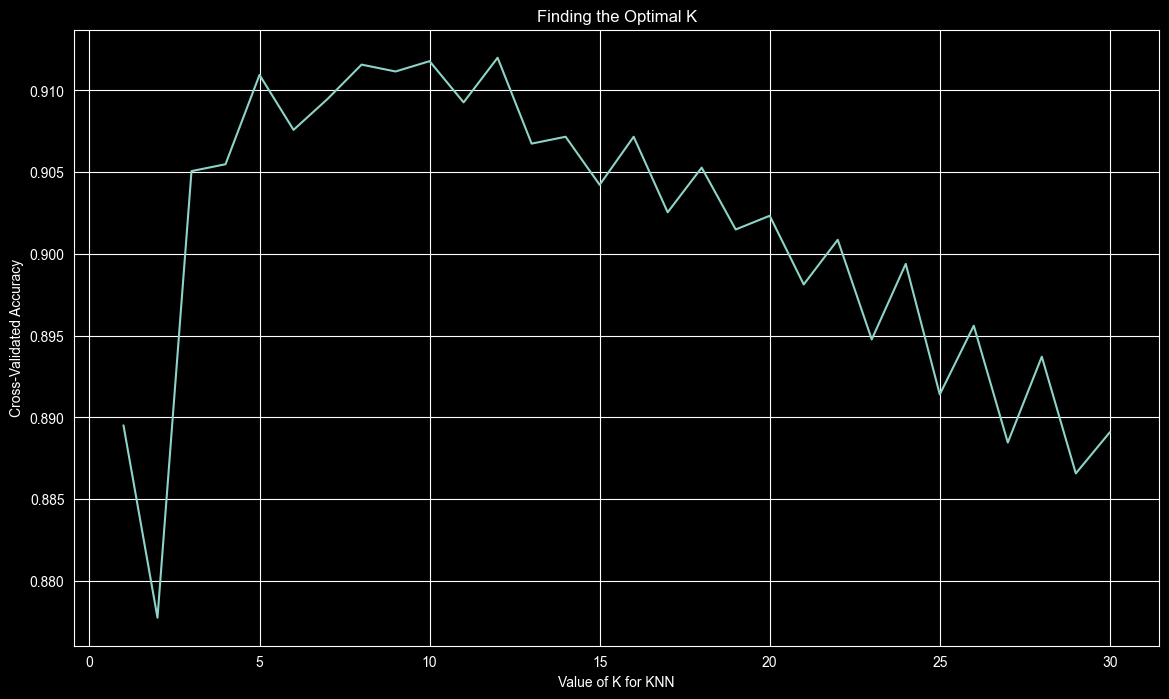

The optimal value of K is: 12
Ακρίβεια: 90.60%
Ανάκληση: 90.60%
Ακρίβεια F1: 90.23%
Περιοχή κάτω από την καμπύλη ROC: 98.09%


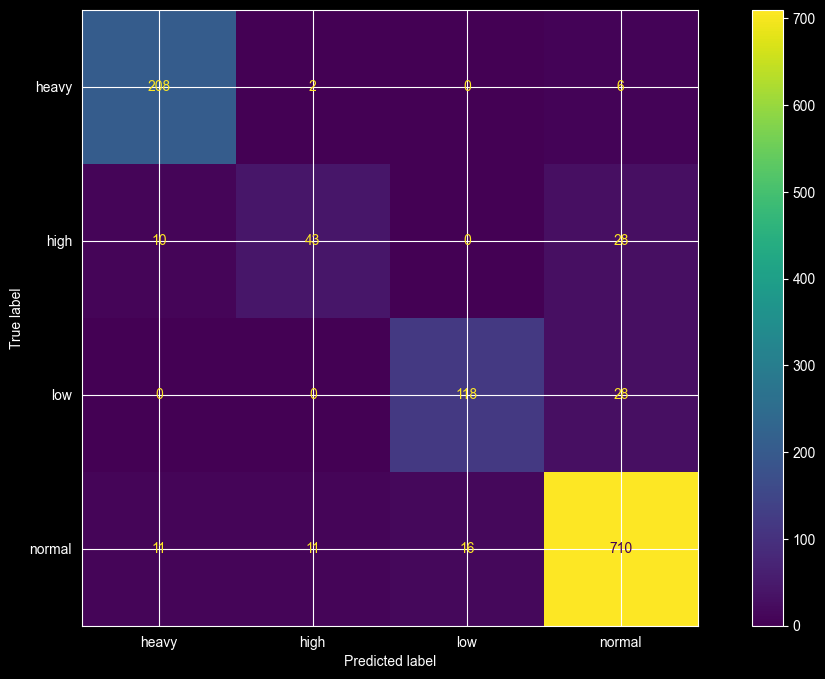

In [57]:
# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Εύρεση του βέλτιστου K χρησιμοποιώντας cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Οπτικοποίηση των αποτελεσμάτων
plt.figure()
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal K')
plt.show()

# Βέλτιστη τιμή του K
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal value of K is: {optimal_k}")

# Εκπαίδευση του μοντέλου KNN με το βέλτιστο K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Πρόβλεψη ετικετών για το δοκιμαστικό σύνολο
y_pred = knn_optimal.predict(X_test)

# Αξιολόγηση της απόδοσης του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_encoder.transform(y_test), knn_optimal.predict_proba(X_test), multi_class='ovr')

print(f"Ακρίβεια: {accuracy*100:.2f}%")
print(f"Ανάκληση: {recall*100:.2f}%")
print(f"Ακρίβεια F1: {f1*100:.2f}%")
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

# Δημιουργία και εμφάνιση του Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn_optimal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

# Οπτικοποίηση Ορίων Απόφασης του Ταξινομητή KNN με Τυχαία Χαρακτηριστικά

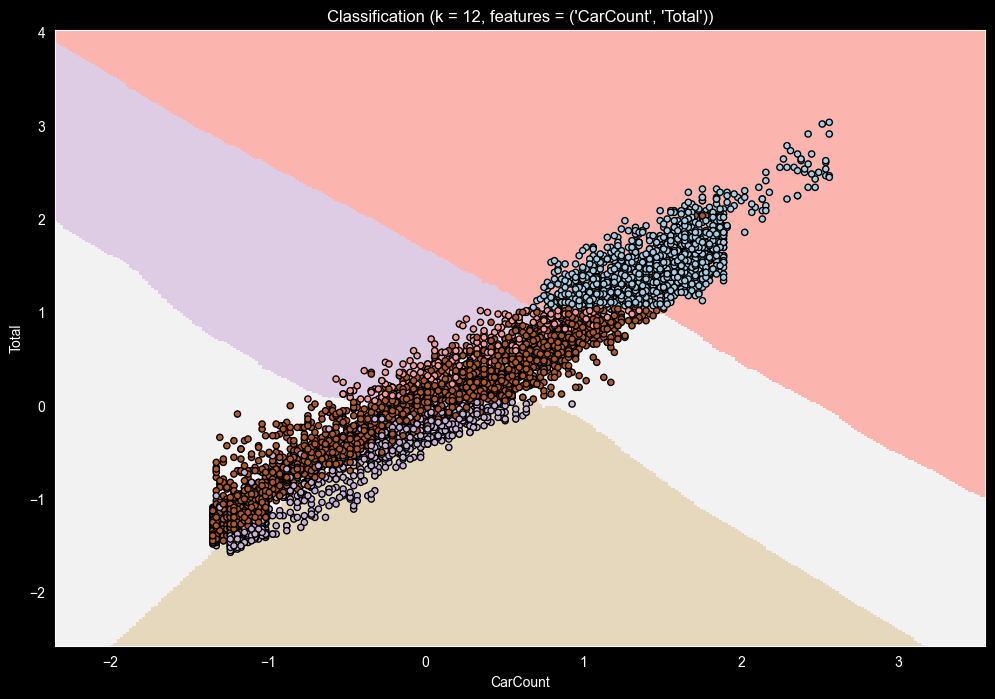

In [58]:
# Ο στόχος είναι να επιλέχθούν τυχαία δύο χαρακτηριστικά από το σύνολο του dataset, να εκπαιδεύσουμε το μοντελο με ενα βέλτιστο Κ και να απεικονίσουμε τα όρια των αποφάσεων.

# Λίστα με τα ονόματα όλων των στηλών εκτός από τη 'Traffic Situation' και 'Hours of the Day'
feature_columns = df.columns.tolist()
feature_columns.remove('Traffic Situation')
feature_columns.remove('Hours of the Day')

# Δημιουργία όλων των πιθανών συνδυασμών των χαρακτηριστικών
feature_combinations = list(combinations(feature_columns, 2))

# Επιλογή τυχαία ενός συνδυασμού
combination = random.choice(feature_combinations)

# Επιλέξτε τα δύο χαρακτηριστικά
X = df[list(combination)].values
y = df['Traffic Situation'].values

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X = scaler.fit_transform(X)

h = .02  # step size in the mesh

# Δημιουργία ενός instance του KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)

# Εκπαίδευση του μοντέλου με τα δεδομένα εκπαίδευσης
knn.fit(X, y)

# Πρόβλεψη της κλάσης για τα δεδομένα δοκιμής
y_pred = knn.predict(X)

# Μετατροπή των κατηγορικών προβλέψεων σε αριθμητικές τιμές
label_encoder = LabelEncoder()
y_pred = label_encoder.fit_transform(y_pred)

# Υπολογισμός των πιθανοτήτων για κάθε κλάση για κάθε σημείο δοκιμής
class_probabilities = knn.predict_proba(X)

# Σχεδίαση των ορίων απόφασης
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Μετατροπή των κατηγορικών προβλέψεων σε αριθμητικές τιμές
Z = label_encoder.transform(Z)

# Ορισμός των χρωματικών χαρτών
cmap_light = plt.cm.Pastel1
cmap_bold = plt.cm.Paired

# Τοποθέτηση του αποτελέσματος σε ένα χρωματικό διάγραμμα
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Σχεδίαση των training points
plt.scatter(X[:, 0], X[:, 1], c=label_encoder.transform(y), cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(combination[0])
plt.ylabel(combination[1])
plt.title(f"Classification (k = 12, features = {combination})")
plt.show()


# NBC (Naive Bayes Classifier) ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ ΤΗΣ ΠΙΘΑΝΟΤΗΤΑΣ ΕΜΦΑΝΙΣΗΣ ΚΥΚΛΟΦΟΡΙΑΚΗΣ ΣΥΜΦΟΡΗΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΑΝΑΛΟΓΙΑ ΟΧΗΜΑΤΩΝ ΤΟ ΧΡΟΝΙΚΟ ΣΗΜΕΙΟ ΚΑΙ ΤΗΝ ΑΚΡΙΒΗ ΜΕΡΑ ΑΛΛΑ ΚΑΙ ΤΗΝ ΠΕΡΙΟΔΟ ΤΟΥ ΜΗΝΑ 

In [59]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

CarCount  BikeCount  BusCount  TruckCount  Total Traffic Situation  \
0        13          2         2          24     41            normal   
1        14          1         1          36     52            normal   
2        10          2         2          32     46            normal   
3        10          2         2          36     50            normal   
4        11          2         1          34     48            normal   
5        15          1         1          39     56            normal   
6        14          2         2          27     45            normal   
7        13          2         1          20     36            normal   
8         7          0         0          26     33            normal   
9        13          0         0          34     47            normal   

   Hours of the Day  Day of the Week  Date Category  
0              0.00                5              0  
1              0.25                5              0  
2              0.50                5              0  
3              0.75                5              0  
4              1.00                5              0  
5              1.25                5              0  
6              1.50                5              0  
7              1.75                5              0  
8              2.00                5              0  
9              2.25                5              0

In [60]:
# Ορισμός εξαρτημένης (y) και ανεξάρτητων μεταβλητών (X)
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [61]:
# Δείχνει τον τύπο του πίνακα X
type(X)

numpy.ndarray

In [62]:
# Δείχνει τον τύπο του πίνακα y
type(y)

pandas.core.series.Series

In [63]:
# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Εκπαίδευση του Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Πρόβλεψη στο σύνολο εκπαίδευσης
y_train_pred = nb.predict(X_train)

# Εκτύπωση κατανομής κλάσεων
print("Κατανομή κλάσεων στο εκπαιδευτικό σύνολο:")
print(pd.Series(y_train).value_counts())
print("\nΚατανομή κλάσεων στο δοκιμαστικό σύνολο:")
print(pd.Series(y_test).value_counts())

# Υπολογισμός της ακρίβειας
precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Ακρίβεια: {precision*100:.2f}%')

# Υπολογισμός του αριθμού των λάθος ταξινομημένων δεδομένων
mislabeled_points = (y_train != y_train_pred).sum()
print(f'Λάθος ταξινομημένα σημεία: {mislabeled_points}')

# Υπολογισμός του ποσοστού των λάθος ταξινομημένων δεδομένων
total_points = len(y_train)
mislabeled_percentage = (mislabeled_points / total_points) * 100
print(f'Ποσοστό λάθος ταξινομημένων δεδομένων: {mislabeled_percentage:.2f}%')

# Εκτύπωση της σύγχυσης πίνακα και λεπτομερούς αναφοράς ταξινόμησης
conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_train, y_train_pred)
print('Λεπτομερής αναφορά ταξινόμησης:\n', class_report)

Κατανομή κλάσεων στο εκπαιδευτικό σύνολο:
Traffic Situation
normal    2862
heavy      921
low        688
high       290
Name: count, dtype: int64

Κατανομή κλάσεων στο δοκιμαστικό σύνολο:
Traffic Situation
normal    748
heavy     216
low       146
high       81
Name: count, dtype: int64
Ακρίβεια: 85.90%
Λάθος ταξινομημένα σημεία: 858
Ποσοστό λάθος ταξινομημένων δεδομένων: 18.02%
Confusion Matrix:
 [[ 907   14    0    0]
 [  43  162    0   85]
 [   3    0  477  208]
 [ 122  379    4 2357]]
Λεπτομερής αναφορά ταξινόμησης:
               precision    recall  f1-score   support

       heavy       0.84      0.98      0.91       921
        high       0.29      0.56      0.38       290
         low       0.99      0.69      0.82       688
      normal       0.89      0.82      0.86      2862

    accuracy                           0.82      4761
   macro avg       0.75      0.77      0.74      4761
weighted avg       0.86      0.82      0.83      4761



# ΕΠΑΝΑΛΗΨΗ ΑΛΓΟΡΙΘΜΟΥ ΜΕ ΔΙΑΦΟΡΕΤΙΚΗ ΑΝΑΛΟΓΙΑ TRAIN-TEST

In [65]:
# Ορισμός εξαρτημένης (y) και ανεξάρτητων μεταβλητών (X)
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
# Δείχνει τον τύπο του πίνακα X
type(X)

# Δείχνει τον τύπο του πίνακα y
type(y)

pandas.core.series.Series

In [67]:
# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [68]:
# Εκπαίδευση του Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Πρόβλεψη στο σύνολο εκπαίδευσης
y_train_pred = nb.predict(X_train)

# Εκτύπωση κατανομής κλάσεων
print("Κατανομή κλάσεων στο εκπαιδευτικό σύνολο:")
print(pd.Series(y_train).value_counts())
print("\nΚατανομή κλάσεων στο δοκιμαστικό σύνολο:")
print(pd.Series(y_test).value_counts())

# Υπολογισμός της ακρίβειας
precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Ακρίβεια: {precision*100:.2f}%')

# Υπολογισμός του αριθμού των λάθος ταξινομημένων δεδομένων
mislabeled_points = (y_train != y_train_pred).sum()
print(f'Λάθος ταξινομημένα σημεία: {mislabeled_points}')

# Υπολογισμός του ποσοστού των λάθος ταξινομημένων δεδομένων
total_points = len(y_train)
mislabeled_percentage = (mislabeled_points / total_points) * 100
print(f'Ποσοστό λάθος ταξινομημένων δεδομένων: {mislabeled_percentage:.2f}%')

# Εκτύπωση της σύγχυσης πίνακα και λεπτομερούς αναφοράς ταξινόμησης
conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_train, y_train_pred)
print('Λεπτομερής αναφορά ταξινόμησης:\n', class_report)

Κατανομή κλάσεων στο εκπαιδευτικό σύνολο:
Traffic Situation
normal    2129
heavy      697
low        525
high       220
Name: count, dtype: int64

Κατανομή κλάσεων στο δοκιμαστικό σύνολο:
Traffic Situation
normal    1481
heavy      440
low        309
high       151
Name: count, dtype: int64
Ακρίβεια: 85.78%
Λάθος ταξινομημένα σημεία: 641
Ποσοστό λάθος ταξινομημένων δεδομένων: 17.95%
Confusion Matrix:
 [[ 686    9    0    2]
 [  31  123    0   66]
 [   1    0  368  156]
 [  94  279    3 1753]]
Λεπτομερής αναφορά ταξινόμησης:
               precision    recall  f1-score   support

       heavy       0.84      0.98      0.91       697
        high       0.30      0.56      0.39       220
         low       0.99      0.70      0.82       525
      normal       0.89      0.82      0.85      2129

    accuracy                           0.82      3571
   macro avg       0.76      0.77      0.74      3571
weighted avg       0.86      0.82      0.83      3571



# ΔΙΑΓΡΑΜΜΑΤΑ ΜΕΘΟΔΟΥ NBC 

# Confusion Matrix

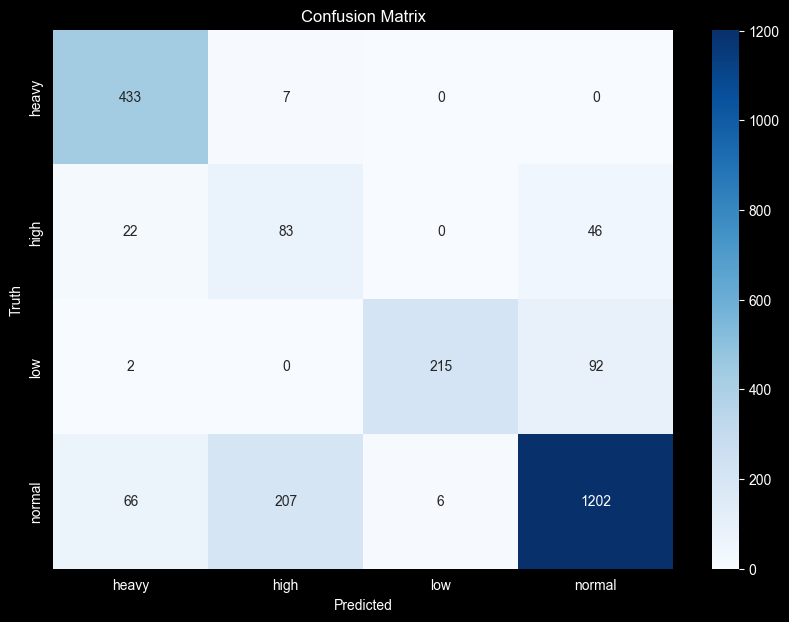

In [70]:
# Make prediction on the correct test set
y_pred = nb.predict(X_test)

# Υπολογισμός του Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Οπτικοποίηση του Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (Receiver Operating Characteristic)

Encoded classes: ['manageable' 'non-manageable']
Αναφορά Ταξινόμησης:
                precision    recall  f1-score   support

    manageable       0.95      0.90      0.93       889
non-manageable       0.75      0.87      0.81       302

      accuracy                           0.90      1191
     macro avg       0.85      0.89      0.87      1191
  weighted avg       0.90      0.90      0.90      1191



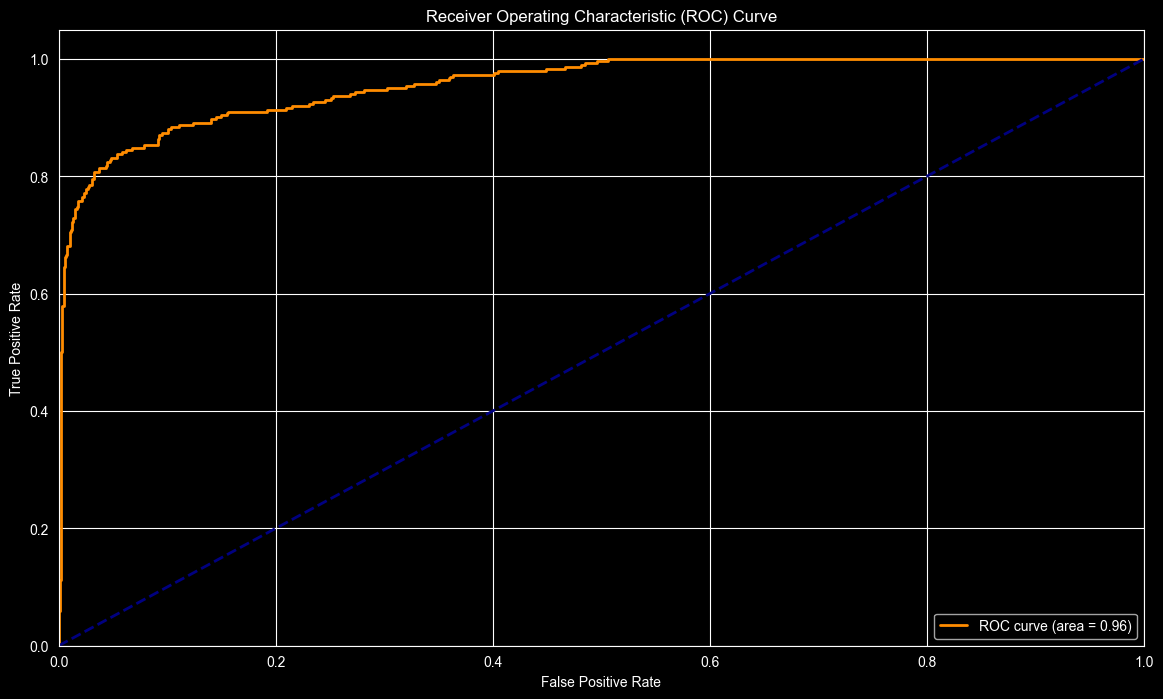

In [71]:
# Το ROC curve ειναι σχεδιασμένο για binary classification problems. Στο προβλημα μας η εξαρτημενη μεταβλητη μπορει να παρει παραπανω απο 2 κατηγορικες τιμες
# γιαυτο θα προχωρησουμε στο one-vs-rest (OvR) approach το οποιο ομως δεν μου πετυχε γι αυτο θα δοκιμασω να χωρεσω τα 4 classes σε 2 για να 
# μπορεσω να παρουσιασω τα metrics (θα κανω την targeted μεταβλητη μου binary)

# Μετατροπή των τιμών της στήλης 'Traffic Situation' σε δυαδικές τιμές
df['Traffic Situation'] = df['Traffic Situation'].replace({
    'low': 'manageable',
    'normal': 'manageable',
    'high': 'non-manageable',
    'heavy': 'non-manageable'
})

# Κωδικοποίηση της εξαρτημένης μεταβλητής 'Traffic Situation' σε αριθμητικές τιμές
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Επαλήθευση των κατηγοριών
print("Encoded classes:", label_encoder.classes_)

# Διαχωρισμός χαρακτηριστικών και εξαρτημένης μεταβλητής
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Διαχωρισμός των δεδομένων σε εκπαιδευτικά και δοκιμαστικά σύνολα με stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Εκπαίδευση του Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Πρόβλεψη στο σύνολο δοκιμών
y_pred = nb.predict(X_test)
y_score = nb.predict_proba(X_test)[:, 1]

# Εκτύπωση της αναφοράς ταξινόμησης (precision, recall, F1-score)
print("Αναφορά Ταξινόμησης:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Υπολογισμός της ROC Curve και της AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Σχεδίαση της ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve

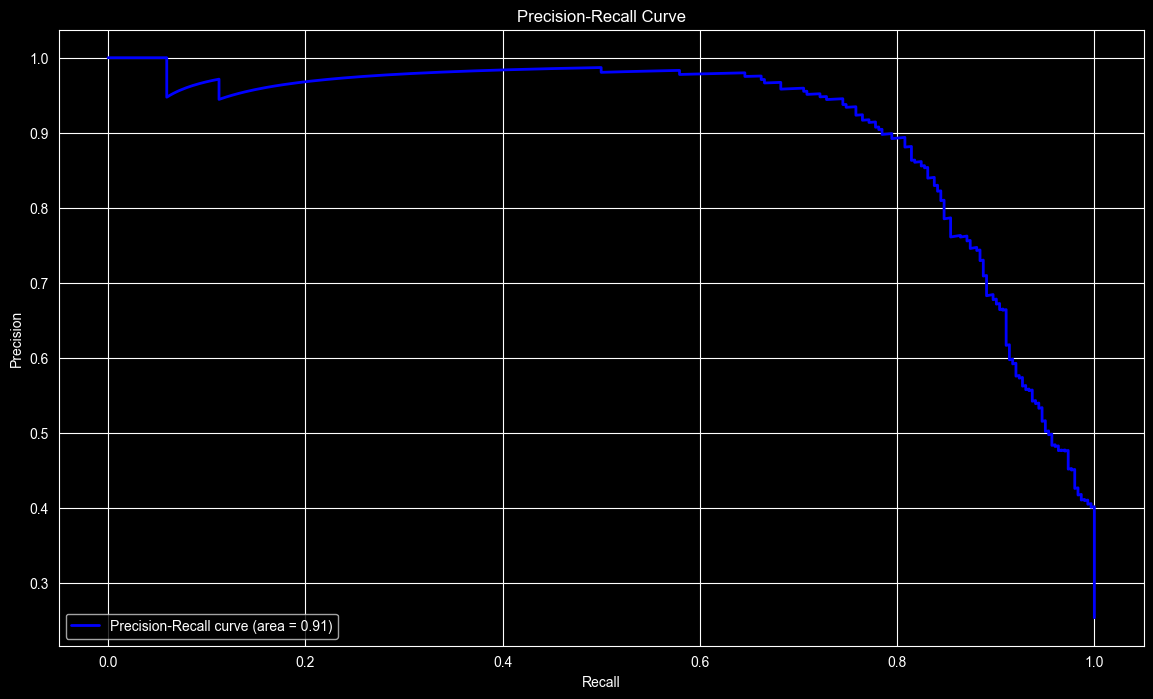

In [72]:
# Υπολογισμός της Precision-Recall Curve και της AUC
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# Σχεδίαση της Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Σύνοψη Αποτελεσμάτων Classification

Αποτέλεσμα Βέλτιστης Τιμής για το K στο KNN
Η βέλτιστη τιμή για το K είναι 12 με ακρίβεια 90.60%, ανάκληση 90.60%, ακρίβεια F1 90.23%, και περιοχή κάτω από την καμπύλη ROC 98.09%.

Classification Analysis για KNN με K=3
Precision: 91.13%
Αναλυτικά Αποτελέσματα:
Heavy:
Precision: 0.92, Recall: 0.96, F1-Score: 0.94
High:
Precision: 0.74, Recall: 0.62, F1-Score: 0.67
Low:
Precision: 0.89, Recall: 0.83, F1-Score: 0.86
Normal: Precision: 0.93, Recall: 0.95, F1-Score: 0.94
Macro Average: Precision: 0.87, Recall: 0.84, F1-Score: 0.85
Weighted Average: Precision: 0.91, Recall: 0.91, F1-Score: 0.91

Αντιστοιχα τα metrics εμφανιζουν ακομα καλυτερη ακριβεια οσο αυξανει η παραμετρος Κ οπως ειδαμε τρεχοντας το μοντελο για Κ=7

Confusion Matrix
Το confusion Matrix δείχνει την κατανομή των πραγματικών και προβλεπόμενων τιμών για τις κατηγορίες traffic : heavy, high, low, normal.
Ανάλυση Βασισμένη στα Αποτελέσματα Ταξινόμησης
Ακρίβεια (Accuracy)
Αυτό σημαίνει ότι το μοντέλο προβλέπει σωστά τις κατηγορίες σε πάνω από 91% των περιπτώσεων.
Precision, Recall και F1-Score
Precision: Υψηλή ακρίβεια για τις κατηγορίες heavy και normal, ενώ για τις κατηγορίες high και low η ακρίβεια είναι χαμηλότερη.
Recall: Πολύ καλή ανάκληση για τις κατηγορίες heavy και normal, μέτρια για την κατηγορία high, και καλή για την κατηγορία low.
F1-Score: Υψηλή τιμή για τις κατηγορίες heavy και normal, ενώ οι κατηγορίες high και low έχουν χαμηλότερη F1-Score.

ROC Curve και AUC
Η καμπύλη ROC δείχνει την απόδοση του μοντέλου σε διάφορα κατώφλια πρόβλεψης. Η περιοχή κάτω από την καμπύλη ROC (AUC) είναι 98.09%, κάτι που υποδεικνύει εξαιρετική απόδοση του μοντέλου στην διάκριση μεταξύ των κατηγοριών.

Precision-Recall Curve
Η καμπύλη Precision-Recall και το Average Precision παρέχουν επίσης μία καλή ένδειξη για την απόδοση του μοντέλου, ιδιαίτερα για την κατηγορία των δύσκολα διακριτών κατηγοριών.

Συμπεράσματα για τις Κλάσεις
Υψηλή Απόδοση: Το μοντέλο KNN με K=12 δείχνει εξαιρετική απόδοση με υψηλή ακρίβεια, recall και F1-score για τις περισσότερες κατηγορίες.
Βελτίωση Μοντέλου: Οι κατηγορίες high και low δείχνουν χαμηλότερες επιδόσεις. Μπορεί να χρειάζεται περαιτέρω βελτιστοποίηση ή χρήση διαφορετικών χαρακτηριστικών για την καλύτερη διάκριση αυτών των κατηγοριών.
